# Global Terrorism Data Analysis


Ryerson University                                                                          

Student: Emil Ibrahim  

Course: CKM136XJ0 Capstone

Student Id: 500862456

Supervisor: Dr.Can Kavaklioglu


# Import Modules

In [1]:
print ("Importing Moduels...")

import warnings
warnings.filterwarnings('ignore')

# For calculations and data 
import numpy as np
import pandas as pd

# For plooting and graphes
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
import matplotlib.patches as mpatches

# For Data preprocessing
from sklearn.preprocessing import LabelEncoder

# For Experimental Desgin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.decomposition import PCA
import itertools

# For Modeling
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

# For Validation
from sklearn.dummy import DummyClassifier

#For NLP 
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

print(" ")
print ("All modules imported successfully" )


Importing Moduels...
 
All modules imported successfully


In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Load dataset

In [2]:
# Read the dataframe
mydata = pd.read_csv('../code/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [3]:
mydata.shape

(181691, 135)

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to dbsource
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
mydata.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'summary', 'crit1', 'crit2',
       ...
       'nreleased', 'addnotes', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',
       'scite1', 'scite2', 'scite3', 'dbsource'],
      dtype='object', length=135)

In [6]:
mydata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,summary,crit1,crit2,...,nreleased,addnotes,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource
0,1.970000e+11,1970,7,2,NaN,0,NaN,NaN,1,1,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,PGIS
1,1.970000e+11,1970,0,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,0,1,1,1,NaN,NaN,NaN,PGIS
2,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS
3,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS
4,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS


# Initial Analysis

## Univariate Analysis 



(detailed data dictionary / list all vaibles and understand what each varible mean and represent)(what is the source of each varible directly measured or calculated based on other varibles or does the vaible has a time domain assoicated) - (Decide on the dependent (target) varibale) (Assigning the corrcet data types and appropriate column names)(for numeric attributes check the 5 number summary min 1sQ mean 3rdQ max  )(for categrical attributes check and decide on the levels , frequency) (check and deal with data inconsistencies , missing values , erros , duplicates , outliers (boxplots) , numeric signs , upper and lower cases , spaces or spcial charachters in strigs) (check distributions of the varibales : Norml distirbution?)(Low variance filter)(check the imbalance in the dependent varbalie) (check time varbiles) (Univariate visulaizations)



In [239]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to dbsource
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [87]:
num1 = mydata.select_dtypes(include =['float64'])
num2 = mydata.select_dtypes(include =['int64'])
obj1 = mydata.select_dtypes(include =['object'])


In [241]:
num1.shape

(181691, 56)

In [242]:
num2.shape

(181691, 21)

In [243]:
obj1.shape

(181691, 58)

In [25]:
num1.columns

Index(['eventid', 'doubtterr', 'alternative', 'multiple', 'latitude',
       'longitude', 'specificity', 'attacktype2', 'attacktype3',
       'weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3',
       'weapsubtype3', 'weaptype4', 'weapsubtype4', 'targsubtype1', 'natlty1',
       'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3',
       'natlty3', 'guncertain1', 'guncertain2', 'guncertain3', 'nperps',
       'nperpcap', 'claimed', 'claimmode', 'compclaim', 'claim2', 'claimmode2',
       'claim3', 'claimmode3', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'propextent', 'propvalue', 'ishostkid',
       'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransom', 'ransomamt',
       'ransomamtus', 'ransompaid', 'ransompaidus', 'hostkidoutcome',
       'nreleased'],
      dtype='object')

In [26]:
num2.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'crit1', 'crit2', 'crit3',
       'country', 'region', 'vicinity', 'attacktype1', 'success', 'suicide',
       'weaptype1', 'targtype1', 'individual', 'property', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [27]:
obj1.columns

Index(['approxdate', 'resolution', 'summary', 'alternative_txt', 'related',
       'country_txt', 'region_txt', 'provstate', 'city', 'location',
       'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt',
       'weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt',
       'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt',
       'weaptype4_txt', 'weapsubtype4_txt', 'weapdetail', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'motive',
       'propextent_txt', 'propcomment', 'divert', 'kidhijcountry',
       'ransomnote', 'hostkidoutcome_txt', 'addnotes', 'scite1', 'scite2',
       'scite3', 'dbsource'],
      dtype='object')

In [29]:
obj1.describe()

,approxdate,resolution,summary,alternative_txt,related,country_txt,region_txt,provstate,city,location,...,propcomment,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource
count,9239,2220,115562,29011,25038,181691,181691,181270,181257,55495,...,57959,324,3305,514,10991,28289,115500,76933,43516,181691
unique,2244,1859,112492,5,14306,205,12,2855,36674,44109,...,19157,143,217,387,7,15429,83988,62263,36090,26
top,"September 18-24, 2016",8/04/98,"09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,"201612010023, 201612010024, 201612010025, 2016...",Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.",...,It is unknown if any property was damaged in t...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection
freq,101,18,100,23410,80,24636,50474,7645,9775,142,...,6966,27,687,36,3606,1607,205,134,139,78002


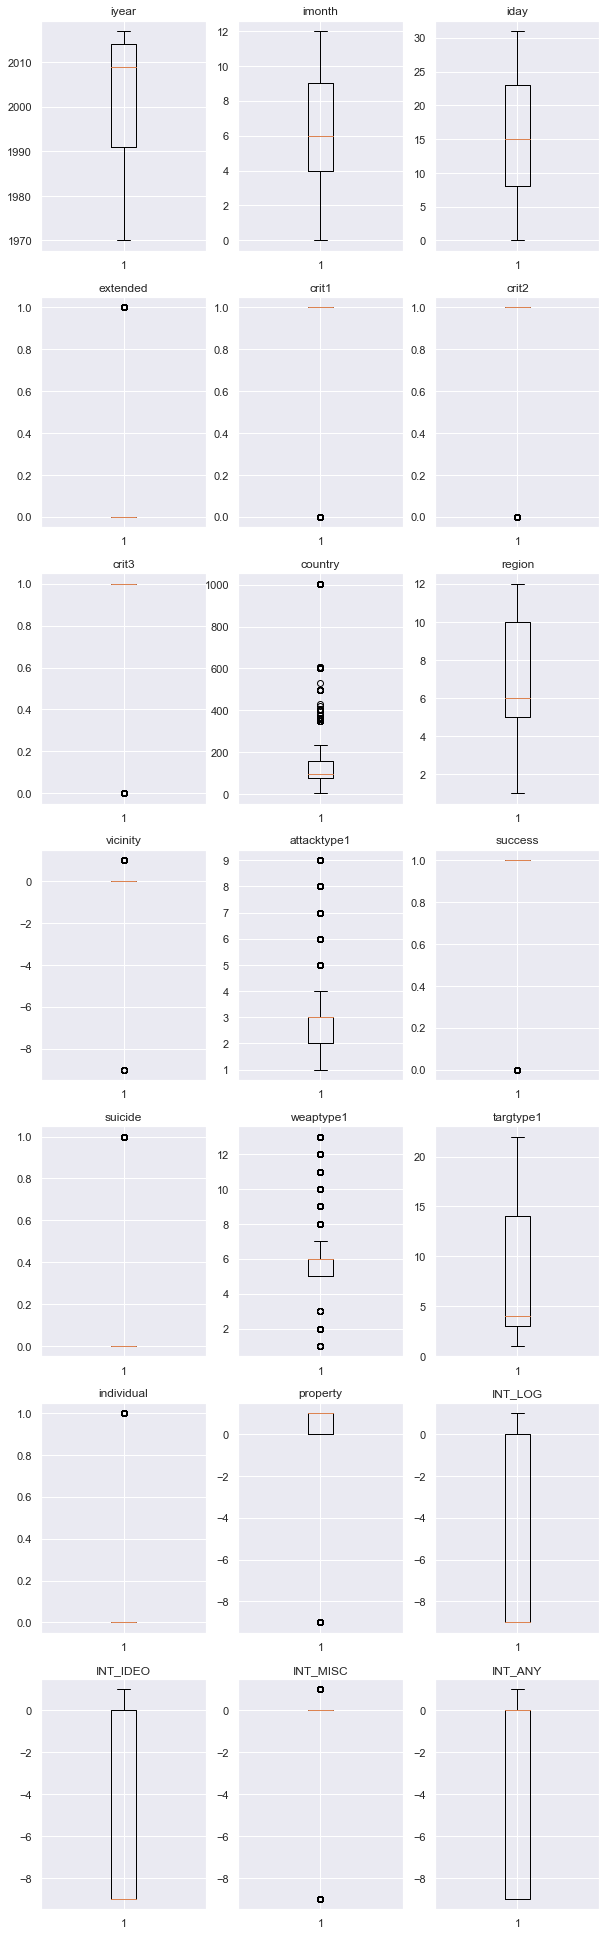

In [81]:
# use box plot to check outliers 
plt.figure(figsize=(10,50))
j=0
for i in num2.columns:
    j=j+1
    plt.subplot (10,3,j)
    plt.boxplot(num2[i]);
    plt.title (num2.columns[j-1]);



In [56]:
mydata.describe()

,eventid,iyear,imonth,iday,extended,crit1,crit2,crit3,doubtterr,alternative,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,0.988530,0.993093,0.875668,-0.523171,1.292923,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,0.106483,0.082823,0.329961,2.455819,0.703729,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
mydata['iyear'].describe()

count    181691.000000
mean       2002.638997
std          13.259430
min        1970.000000
25%        1991.000000
50%        2009.000000
75%        2014.000000
max        2017.000000
Name: iyear, dtype: float64

In [58]:
mydata['success'].describe()

count    181691.000000
mean          0.889598
std           0.313391
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

In [59]:
mydata['country_txt'].describe()

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object

In [60]:
#list the levels
mydata['country_txt'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [61]:
# Frequency
mydata['country_txt'].value_counts()

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


In [3]:
mydata['gname'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [4]:
mydata['gname'].value_counts()

Unknown                                                                82782
Taliban                                                                 7478
Islamic State of Iraq and the Levant (ISIL)                             5613
Shining Path (SL)                                                       4555
Farabundo Marti National Liberation Front (FMLN)                        3351
Al-Shabaab                                                              3288
New People's Army (NPA)                                                 2772
Irish Republican Army (IRA)                                             2671
Revolutionary Armed Forces of Colombia (FARC)                           2487
Boko Haram                                                              2418
Kurdistan Workers' Party (PKK)                                          2310
Basque Fatherland and Freedom (ETA)                                     2024
Communist Party of India - Maoist (CPI-Maoist)                          1878

Text(0, 0.5, 'number')

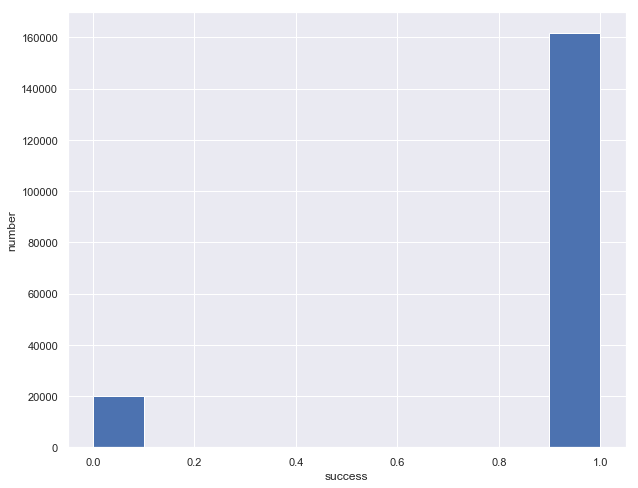

In [65]:
# check the traget label
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
mydata['success'].plot.hist(ax=ax)
ax.set_xlabel('success')
ax.set_ylabel('number')


Text(0, 0.5, 'number incedent')

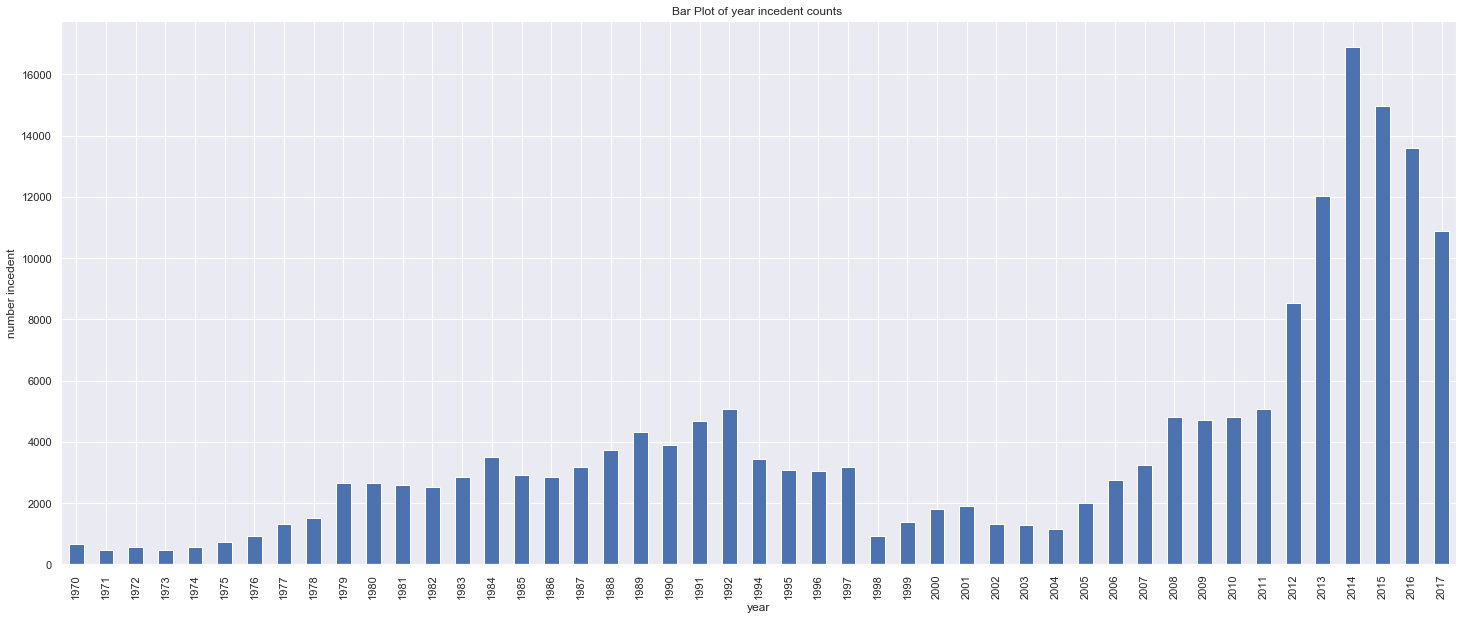

In [66]:
 
counts = mydata['iyear'].value_counts(sort= False)
fig = plt.figure(figsize=(25,10))
ax =fig.gca()
counts[0:].plot.bar(ax = ax)
ax.set_title('Bar Plot of year incedent counts ')
ax.set_xlabel('year')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number incedent')

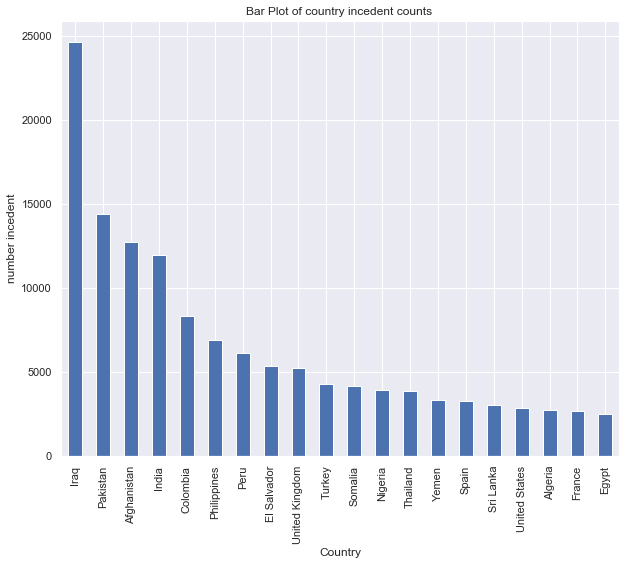

In [67]:
counts = mydata['country_txt'].value_counts()
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of country incedent counts ')
ax.set_xlabel('Country')
ax.set_ylabel('number incedent')

In [68]:
counts = mydata['country_txt'].value_counts()
counts

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


### Cleaning Data

Based on the codebook and detailed data dictionary for the dataset (files can be found on the documents folder): (crit1, crit2, crit3 , doubtterr) record which of the inclusion criteria are met. to filter out those incidents whose inclusion was based on a criterion which they believe does constitute terrorism proper.

Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1) = 1 

Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2) =1

Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3) =1

Doubt Terrorism Proper? (doubtterr) =0


In [7]:
mydata['doubtterr'] = mydata['doubtterr'].replace(-9,0)

In [8]:
#mydata.doubtterr

In [9]:
mydata = mydata[(mydata.crit1 == 1) & (mydata.crit2 == 1) & (mydata.crit3 == 1) & (mydata.doubtterr == 0)]

In [10]:
mydata.shape

(152622, 135)

#### Dealing with null values

In [11]:
mydata.shape[0]

152622

In [12]:
# find Null value , calculate % of missing value from total , sort de-ascending
list1 =100*mydata.isnull().sum()/mydata.shape[0]
list1.sort_values(ascending=False)

alternative_txt     99.996069
alternative         99.996069
gsubname3           99.994103
weapsubtype4_txt    99.961342
weapsubtype4        99.961342
weaptype4_txt       99.958722
weaptype4           99.958722
claimmode3          99.929892
claimmode3_txt      99.929892
gsubname2           99.911546
guncertain3         99.836197
claim3              99.836197
gname3              99.833576
divert              99.803436
attacktype3_txt     99.741191
attacktype3         99.741191
ransomnote          99.701223
claimmode2_txt      99.678945
claimmode2          99.678945
ransompaidus        99.676325
ransomamtus         99.669772
ransompaid          99.549213
corp3               99.384754
targsubtype3_txt    99.340200
targsubtype3        99.340200
natlty3             99.312681
natlty3_txt         99.312681
target3             99.294990
targtype3           99.294335
targtype3_txt       99.294335
                      ...    
country              0.000000
iyear                0.000000
crit2     

In [13]:
#droping more than 75% Null values attributes
mylist = []
for i in mydata:
    if 100*mydata[i].isnull().sum()/mydata.shape[0] > 75:
        mylist.append(i)

In [14]:
len(mylist)

70

In [15]:
mylist

['approxdate',
 'resolution',
 'alternative',
 'alternative_txt',
 'related',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'compclaim',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'propvalue',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus',
 'ransomnote',


In [16]:
mydata = mydata.drop(mylist,axis=1)

In [17]:
mydata.shape

(152622, 65)

In [18]:
#Null value 
list1 =100*mydata.isnull().sum()/mydata.shape[0]
list1.sort_values(ascending=False)

motive              70.491803
location            68.623789
propcomment         66.829815
propextent_txt      63.577990
propextent          63.577990
scite2              57.366566
ransom              56.964920
nperps              39.046795
nperpcap            38.402720
nwoundte            37.522113
weapdetail          36.763376
scite1              36.602849
nkillter            36.590400
summary             36.564191
claimed             36.558294
nwoundus            35.668514
nkillus             35.543369
corp1               24.995086
weapsubtype1_txt    11.552070
weapsubtype1        11.552070
nwound               8.070265
targsubtype1_txt     6.536410
targsubtype1         6.536410
nkill                5.215500
longitude            2.231002
latitude             2.230347
natlty1_txt          0.986096
natlty1              0.986096
target1              0.377403
city                 0.258154
                      ...    
crit2                0.000000
crit3                0.000000
crit1     

In [19]:
mydata.head()

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,propcomment,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,dbsource
0,1.970000e+11,1970,7,2,0,NaN,1,1,1,0.0,...,NaN,0.0,0.0,0,0,0,0,NaN,NaN,PGIS
1,1.970000e+11,1970,0,0,0,NaN,1,1,1,0.0,...,NaN,1.0,1.0,0,1,1,1,NaN,NaN,PGIS
2,1.970010e+11,1970,1,0,0,NaN,1,1,1,0.0,...,NaN,0.0,0.0,-9,-9,1,1,NaN,NaN,PGIS
3,1.970010e+11,1970,1,0,0,NaN,1,1,1,0.0,...,NaN,0.0,0.0,-9,-9,1,1,NaN,NaN,PGIS
4,1.970010e+11,1970,1,0,0,NaN,1,1,1,0.0,...,NaN,0.0,0.0,-9,-9,1,1,NaN,NaN,PGIS


In [20]:
# set text to lower case
mydata.target1 = mydata.target1.str.lower()
mydata.gname = mydata.gname.str.lower()
mydata.summary = mydata.summary.str.lower()    
mydata.city = mydata.city.str.lower()
mydata.weapsubtype1_txt = mydata.weapsubtype1_txt.str.lower()
mydata.natlty1_txt = mydata.natlty1_txt.str.lower()
mydata.provstate = mydata.provstate.str.lower()

mydata.country_txt = mydata.country_txt.str.lower()
mydata.region_txt =  mydata.region_txt.str.lower()
mydata.attacktype1_txt  = mydata.attacktype1_txt.str.lower()
mydata.targtype1_txt   = mydata.targtype1_txt.str.lower()


In [21]:
#fill null vaules 
mydata['weapsubtype1_txt'].fillna('No Record', inplace=True)
mydata['natlty1_txt'].fillna('unknown', inplace=True)
mydata['target1'].fillna('unknown', inplace=True)
mydata['city'].fillna('unknown', inplace=True)
mydata['provstate'].fillna('unknown', inplace=True)

mydata['country_txt'].fillna('unknown', inplace=True)
mydata['region_txt'].fillna('unknown', inplace=True)
mydata['attacktype1_txt'].fillna('unknown', inplace=True) 
mydata['targtype1_txt'].fillna('unknown', inplace=True)

In [22]:
#replaceve unk with unknown
mydata.target1 = mydata.target1.replace('unk','unknown')

In [23]:
# fill missing value for nkill and nwound with the median
mydata.nkill = np.round(mydata.nkill.fillna(mydata.nkill.median())).astype(int) 
mydata.nwound = np.round(mydata.nwound.fillna(mydata.nwound.median())).astype(int) 

In [24]:
mydata.weaptype1_txt.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)

## BiVariate Analysis 

(pairwise relations) (pairwise visuliazations like scatter plots) (correlation analysis spearman or pearson)

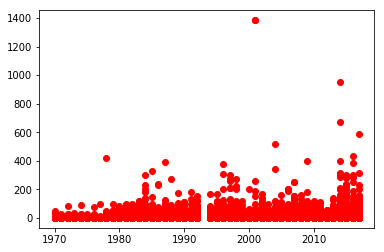

In [26]:
plt.plot (mydata['iyear'] , mydata['nkill'],'ro')

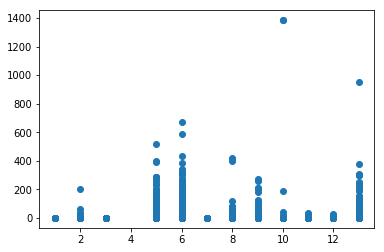

In [27]:
plt.scatter(mydata['weaptype1'] , mydata['nkill'])


(0, 500)

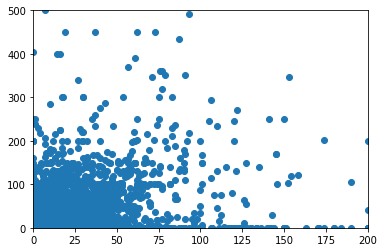

In [28]:
ax =plt.subplot(1,1,1)
ax.scatter(mydata['nkill'] , mydata['nwound'])
ax.set_xlim([0,200])
ax.set_ylim([0,500])


(0, 200)

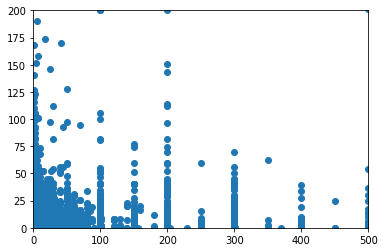

In [29]:
ax =plt.subplot(1,1,1)
ax.scatter(mydata['nperps'] , mydata['nkill'])
ax.set_xlim([0,500])
ax.set_ylim([0,200])

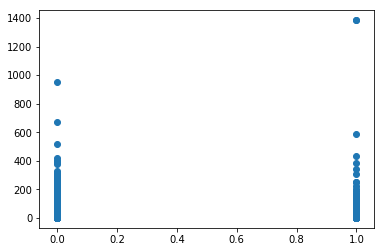

In [30]:
plt.scatter(mydata['suicide'] , mydata['nkill'])

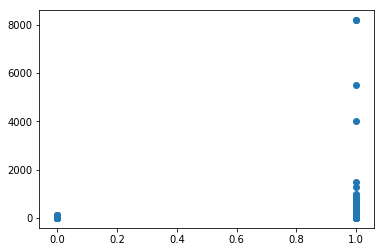

In [31]:
plt.scatter(mydata['success'] , mydata['nwound'])

Text(0, 0.5, 'nkill / nwound')

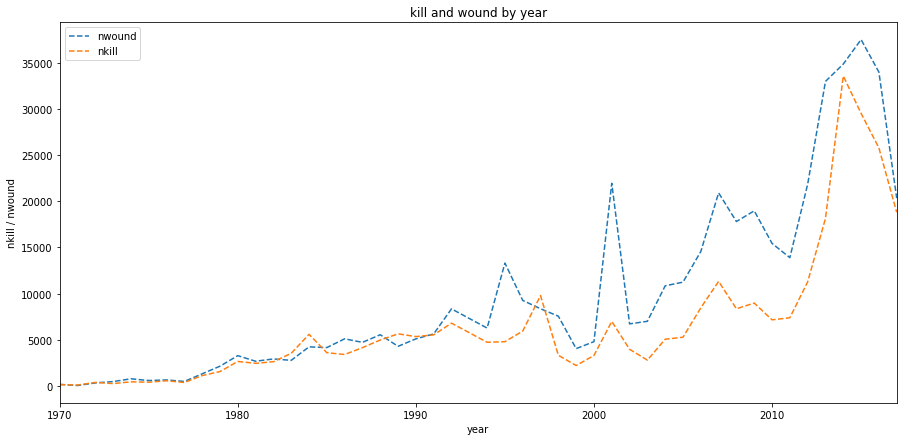

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['nwound'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='kill and wound by year')
mydata.groupby('iyear', as_index=False)['nkill'].sum().plot.line(ax = ax , x='iyear' , style ='--' )
                                                                 
ax.set_xlabel("year")
ax.set_ylabel("nkill / nwound")

## Multivaritae Analysis 

(relations between more than 2 varibales)(statistical tools such as one way analysis or rank or to compare the means


(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text xticklabel objects>)

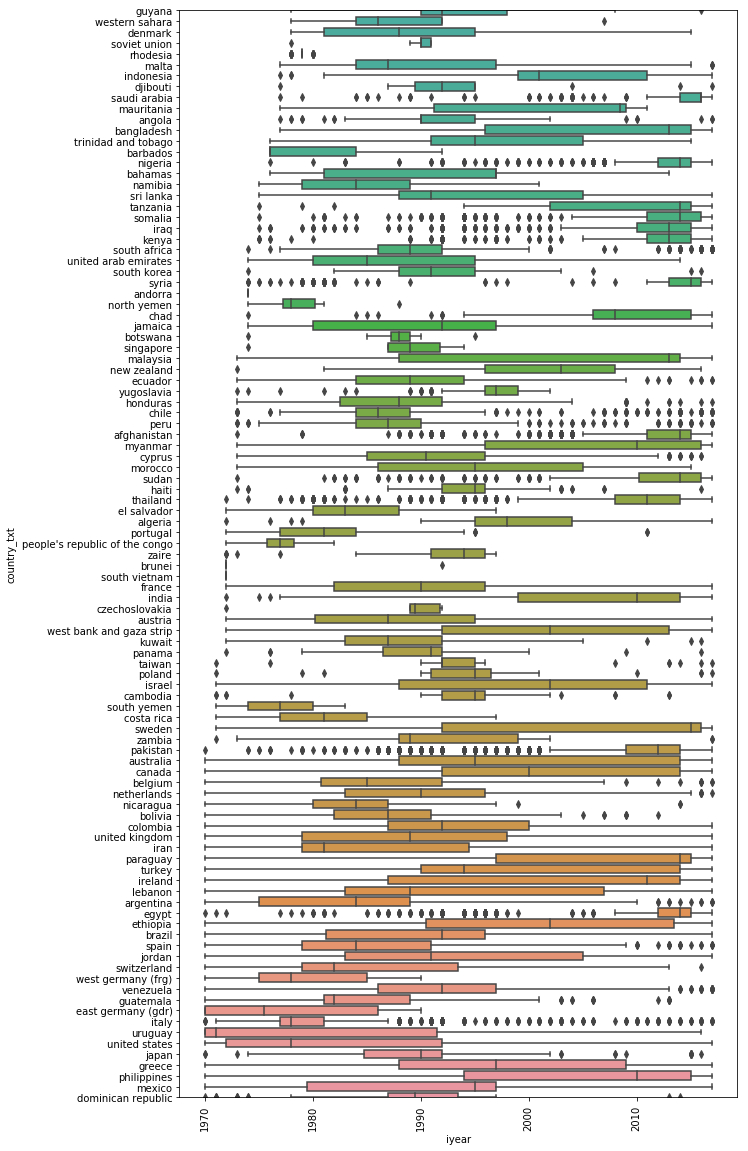

In [33]:
var = 'iyear'
data = pd.concat([mydata['country_txt'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 20))
fig = sns.boxplot(x=var, y="country_txt", data=data)
fig.axis(ymin=0, ymax=100)
plt.xticks(rotation=90)

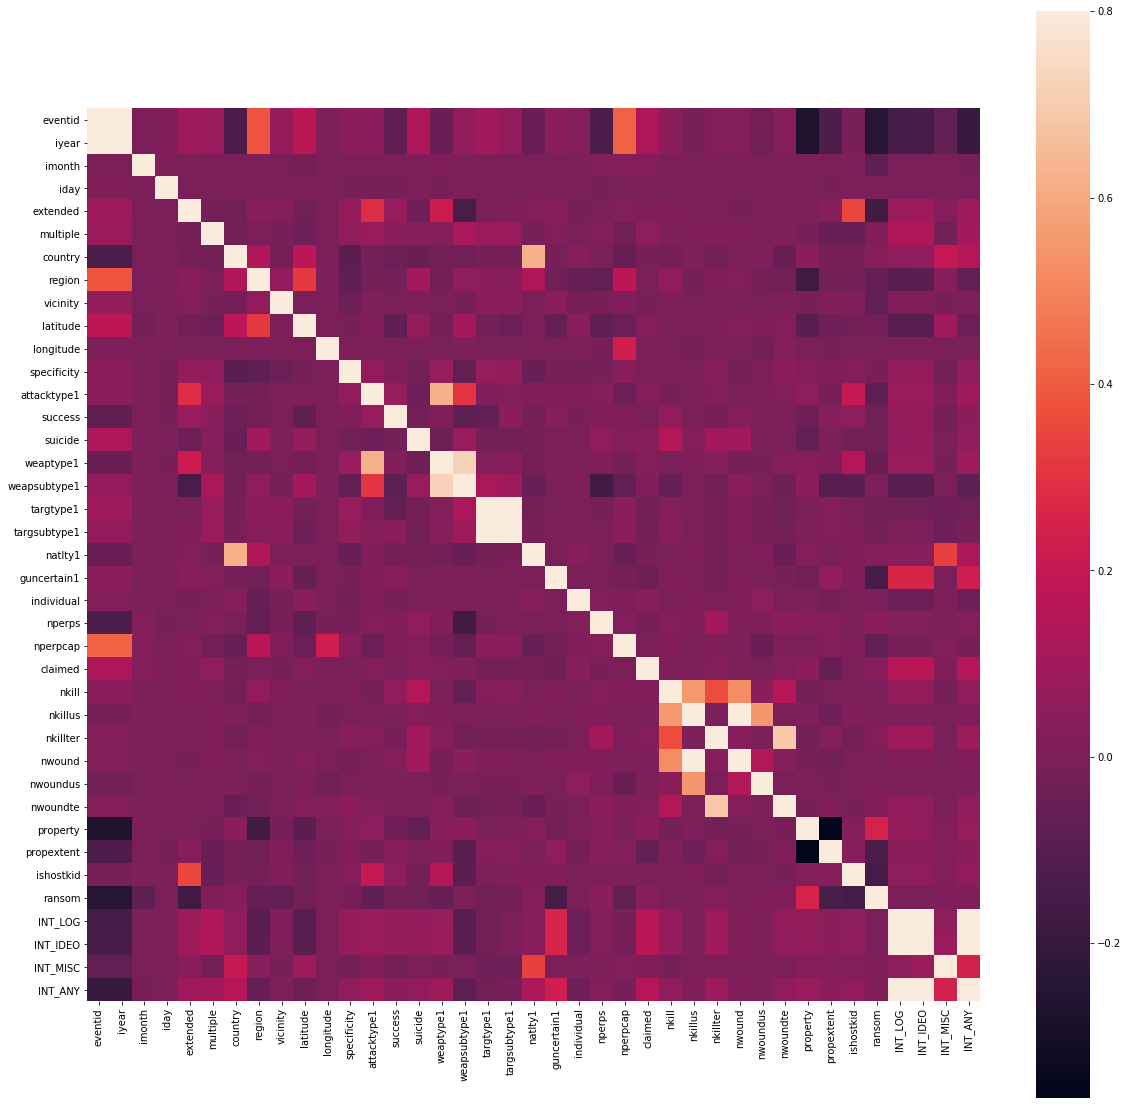

In [34]:
#correlation matrix
list1 = ['crit1' , 'crit2' , 'crit3' , 'doubtterr']
mydata1 = mydata.drop(list1,axis=1)
corrmat = mydata1.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

In [35]:
print(corrmat)

               eventid     iyear    imonth      iday  extended  multiple  \
eventid       1.000000  0.999996  0.000557  0.015058  0.095495  0.080544   
iyear         0.999996  1.000000 -0.002024  0.015042  0.095482  0.080562   
imonth        0.000557 -0.002024  1.000000  0.003912  0.000804 -0.005756   
iday          0.015058  0.015042  0.003912  1.000000 -0.004886 -0.002900   
extended      0.095495  0.095482  0.000804 -0.004886  1.000000 -0.016545   
multiple      0.080544  0.080562 -0.005756 -0.002900 -0.016545  1.000000   
country      -0.132264 -0.132249 -0.005896  0.003793 -0.018848 -0.021803   
region        0.383858  0.383871 -0.003291  0.006445  0.037557 -0.000189   
vicinity      0.063903  0.063915 -0.004319 -0.005663  0.023580 -0.013096   
latitude      0.179660  0.179707 -0.018140  0.003501 -0.025651 -0.034897   
longitude     0.004222  0.004233 -0.004216 -0.002490  0.000588  0.001067   
specificity   0.042012  0.042001  0.002767 -0.009960  0.067445  0.054018   
attacktype1 

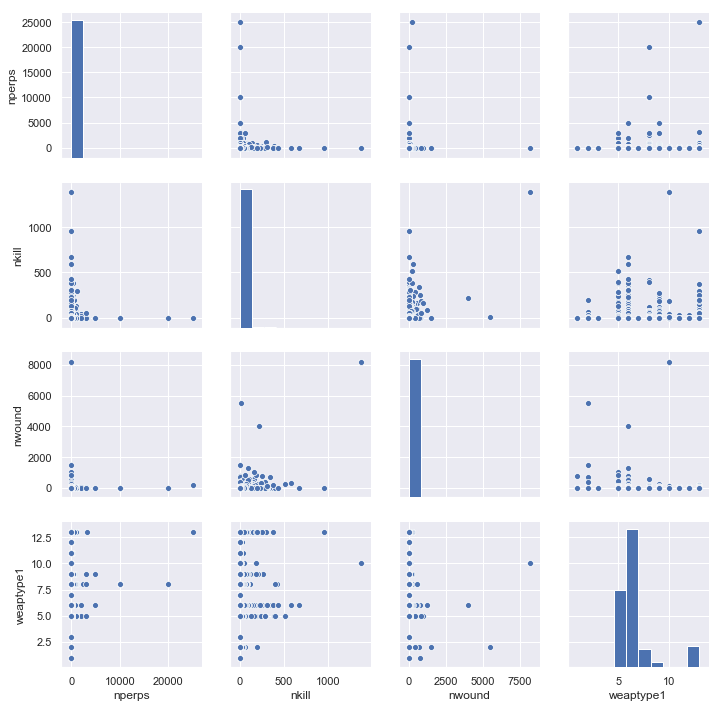

In [36]:
sns.set()
cols = ['nperps','nkill','nwound', 'weaptype1']
sns.pairplot(mydata[cols], height = 2.5)
plt.show();

## Exploratory Anaysis

Normalizing / scaling
Sub-setting the data (may foucs on one coutry or regin analysis or undersand the weapons used more ofen)
Decision rules , association rules , n grams
Clustring such as K-mean 
Hypotheise analysis (metntal inllness, education, GDP/economic,war status, unemployment ,internet growth / technlogy /telecom tech such as AlThuria phones, healthcare, weather, virtual currrencies such as cryptocoin, presedint of USA periods, UN head periods)
NLP analysis for some text attributes 


Text(0.5, 1.0, 'Terroist attacks nkill')

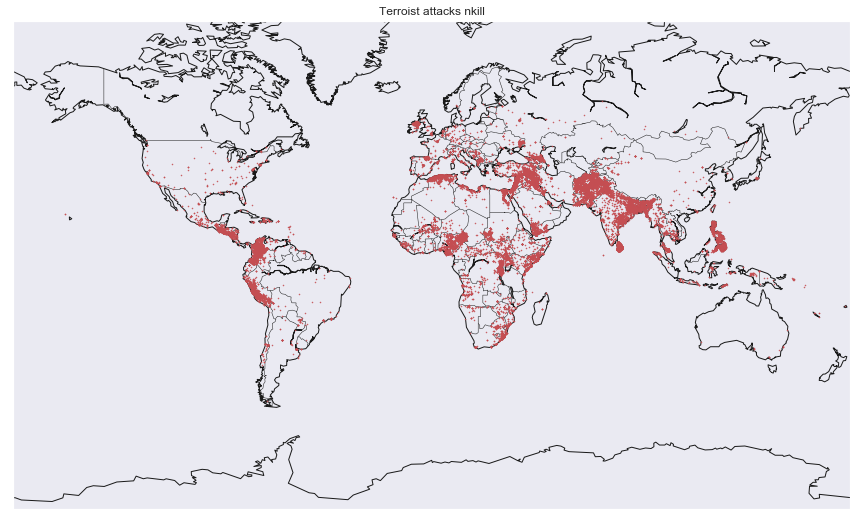

In [37]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nkill'] >=1].latitude)
long_100=list(mydata[mydata['nkill']>=1].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks nkill")

Text(0.5, 1.0, 'Terroist attacks nwounded')

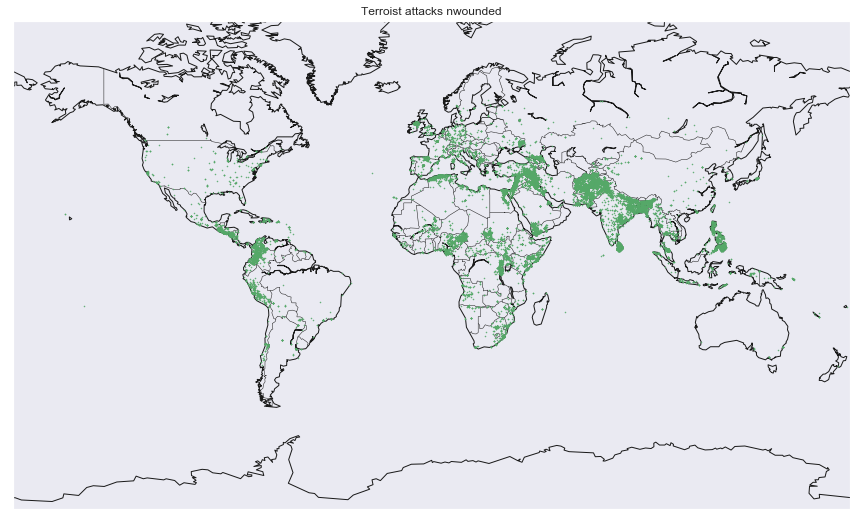

In [38]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nwound'] >=1].latitude)
long_100=list(mydata[mydata['nwound']>=1].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'g')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks nwounded")

Text(0.5, 1.0, 'Terroist attacks nkilled is red and nwound is blue')

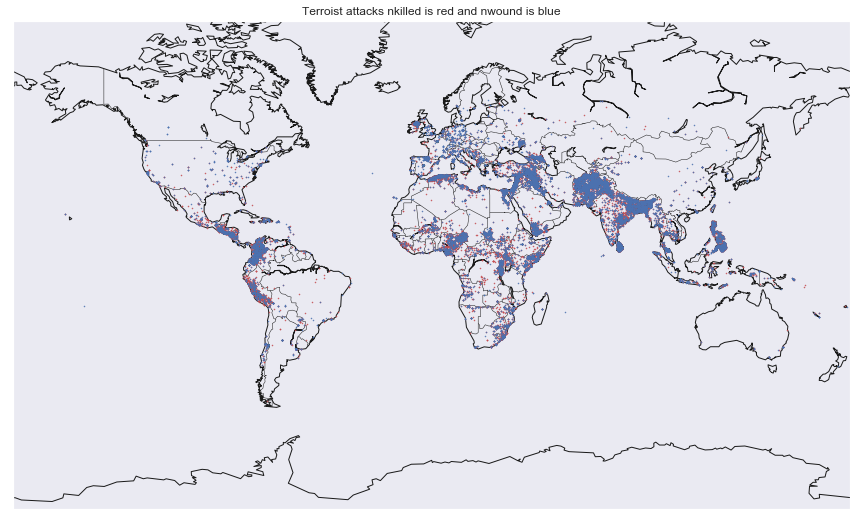

In [39]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100 = list(mydata[mydata['nkill'] >= 1].latitude)
#lat_100 = list(mydata[mydata['nwound'] >=1].latitude)
long_100 = list(mydata[mydata['nkill'] >= 1].longitude)

lat_200=list(mydata[(mydata['nwound'] >= 1)].latitude)
long_200=list(mydata[(mydata['nwound'] >= 1)].longitude)


x_100,y_100=m3(long_100, lat_100)
x_200,y_200=m3(long_200, lat_200)

m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
m3.plot(x_200, y_200,'go',markersize=0.5,color = 'b')


fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks nkilled is red and nwound is blue")

In [42]:
#NLP
motive = mydata['motive']
motive.dropna(inplace=True)
motive

5            To protest the Cairo Illinois Police Deparment
8               To protest the War in Vietnam and the draft
9               To protest the War in Vietnam and the draft
17        Suspected motives were to protest the Vietnam ...
19        Retaliation for the store owner who shot and k...
22        The incident took place during disturbances be...
23        The incident took place during heightened anti...
24                      Intimidate the Black Panther Party.
28        The attack occurred during the violent Iowa Be...
30                                           To kill police
31        African American opposition to the school inte...
32                                           To kill police
33                           Protest and sabotage the draft
36        The attack occurred during the violent Iowa Be...
37        The attack occurred during the violent Iowa Be...
38        To protest the R.O.T.C. program and the War in...
42             To protest police presenc

In [43]:
#NLP
motive_words=''
for i in range(45035):
    reason=re.sub('[^a-zA-z]',' ',motive.iloc[i])
    reason=reason.lower()
    reason=reason.split()
    remove=['specific','motive','unknown', 'nknown','un','known','attack','source',
            'sources','responsibility','claimed','incident','carried','stated','larger', 'trend','part']
    reason=[word for word in reason if word not in remove]
    reason=[word for word in reason if word not in set(stopwords.words('english'))]
    for word in reason:
        motive_words = motive_words+word+' '

In [44]:
motive_wordcloud=WordCloud(width=1200,height=720,random_state=101).generate(motive_words)

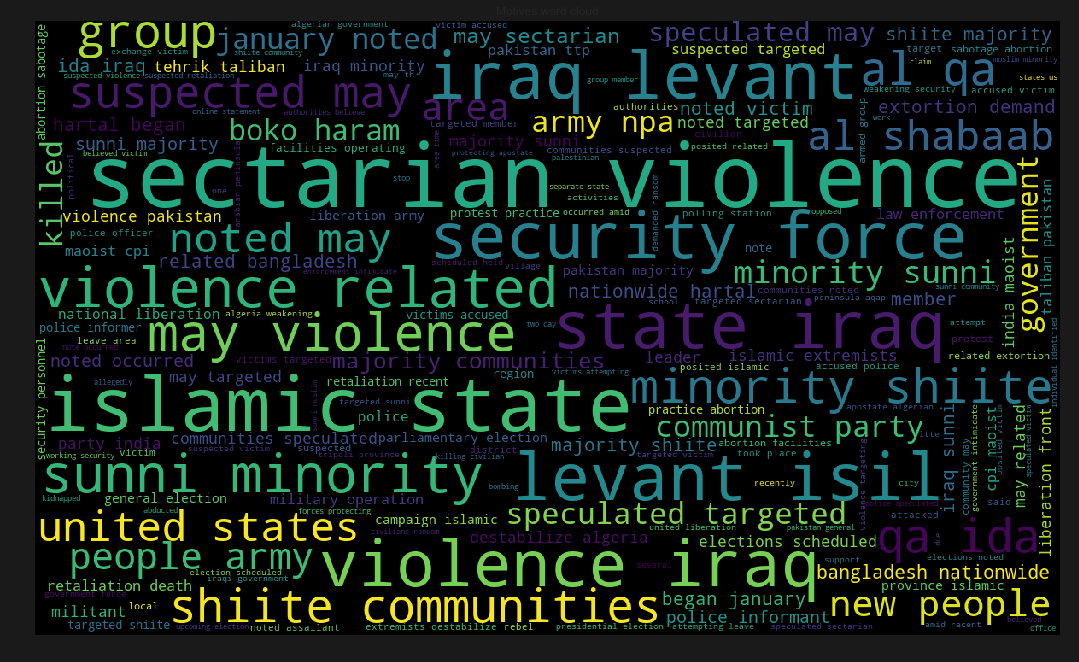

In [45]:
plt.figure(facecolor='k',figsize=(16,9))
plt.imshow(motive_wordcloud)
plt.axis('off')
plt.title('Motives word cloud')
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Attack type')

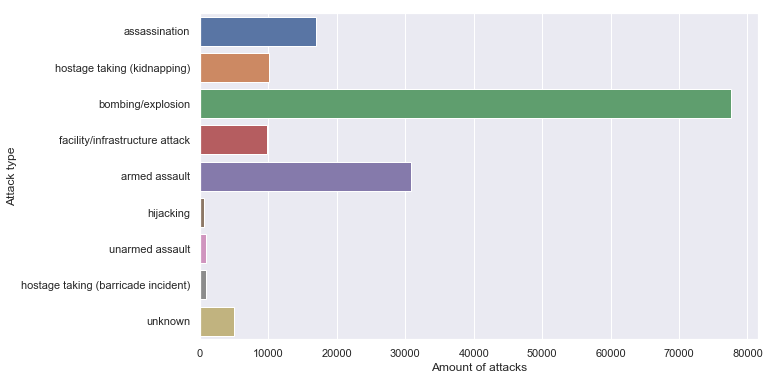

In [46]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y="attacktype1_txt", data=mydata)
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("Attack type")

Text(0, 0.5, 'weapon type')

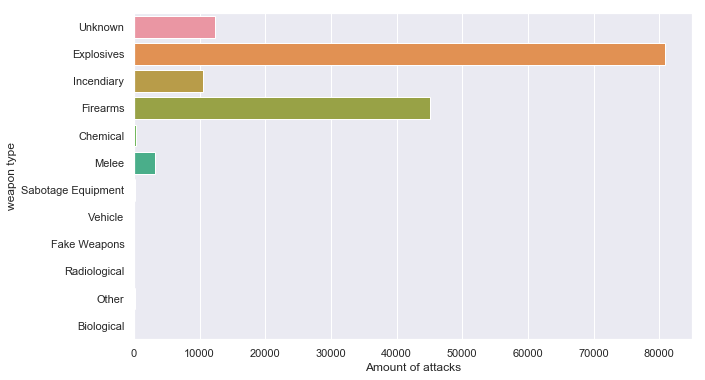

In [47]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y="weaptype1_txt", data=mydata)
ax.set_xlabel("Amount of attacks")
ax.set_ylabel("weapon type")

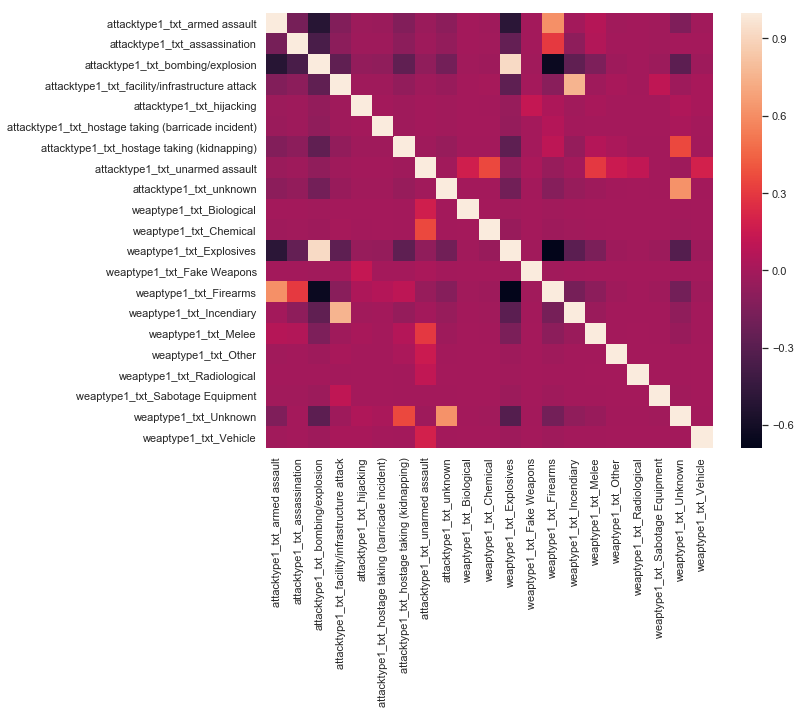

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.get_dummies(mydata[['attacktype1_txt', 'weaptype1_txt']]).corr())
plt.show()

Text(0, 0.5, 'number incedent')

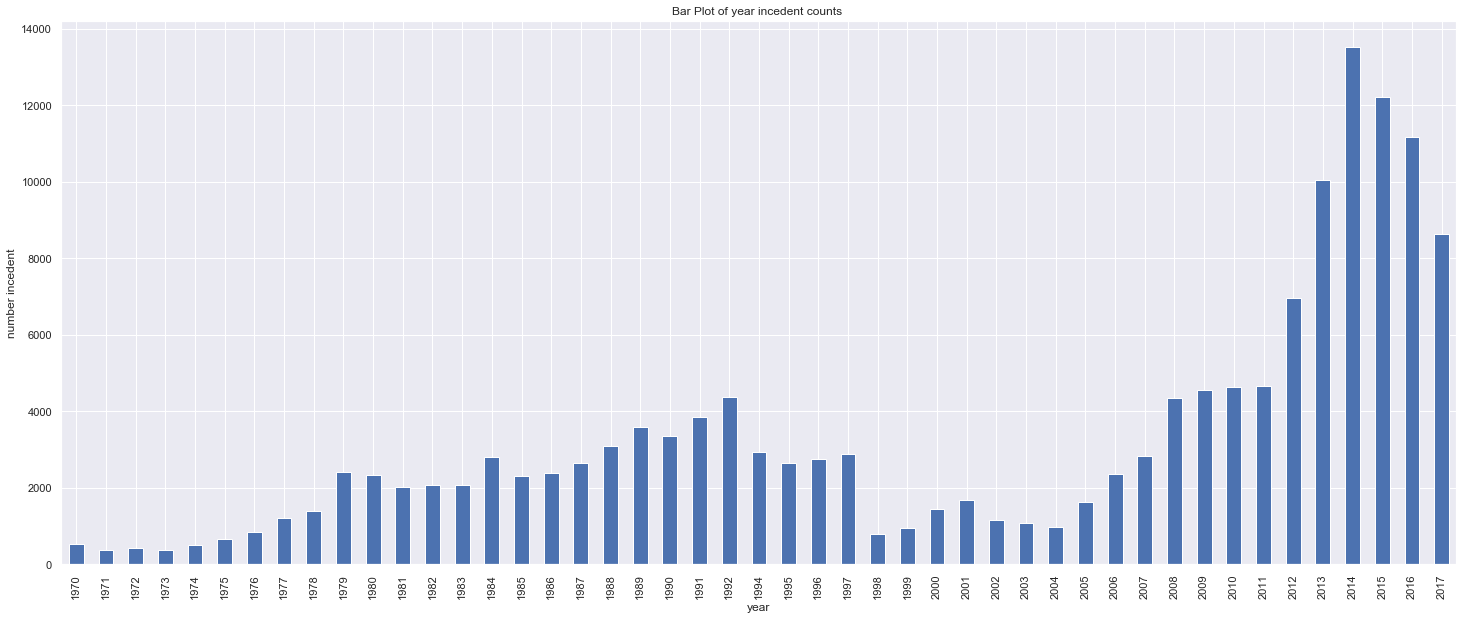

In [49]:
counts = mydata['iyear'].value_counts(sort= False)
fig = plt.figure(figsize=(25,10))
ax =fig.gca()
counts[0:].plot.bar(ax = ax)
ax.set_title('Bar Plot of year incedent counts ')
ax.set_xlabel('year')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number incedent')

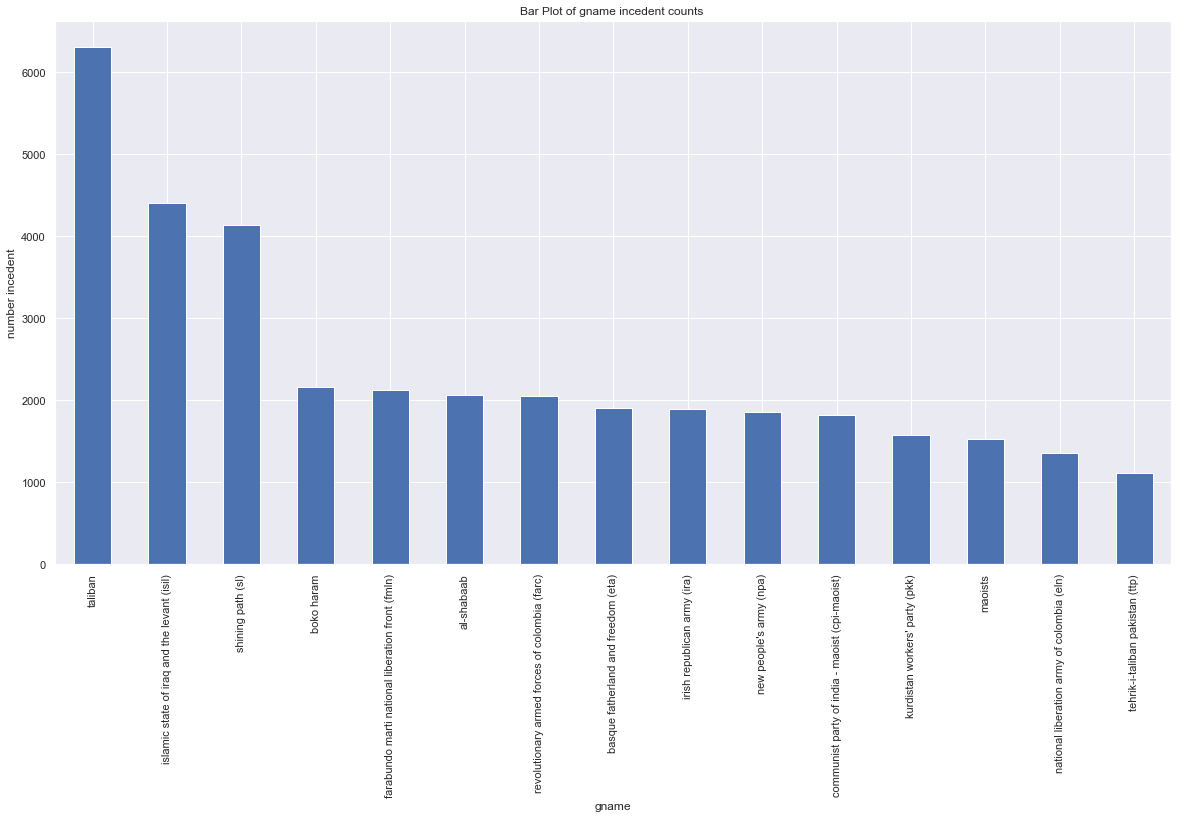

In [50]:
#Bar plot
mydatag = mydata[mydata.gname != 'unknown']
counts = mydatag['gname'].value_counts().nlargest(15)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of gname incedent counts ')
ax.set_xlabel('gname')
ax.set_ylabel('number incedent')

In [51]:
counts

taliban                                             6314
islamic state of iraq and the levant (isil)         4409
shining path (sl)                                   4139
boko haram                                          2166
farabundo marti national liberation front (fmln)    2129
al-shabaab                                          2070
revolutionary armed forces of colombia (farc)       2047
basque fatherland and freedom (eta)                 1905
irish republican army (ira)                         1888
new people's army (npa)                             1856
communist party of india - maoist (cpi-maoist)      1816
kurdistan workers' party (pkk)                      1583
maoists                                             1525
national liberation army of colombia (eln)          1356
tehrik-i-taliban pakistan (ttp)                     1117
Name: gname, dtype: int64

Text(0, 0.5, 'number incedent')

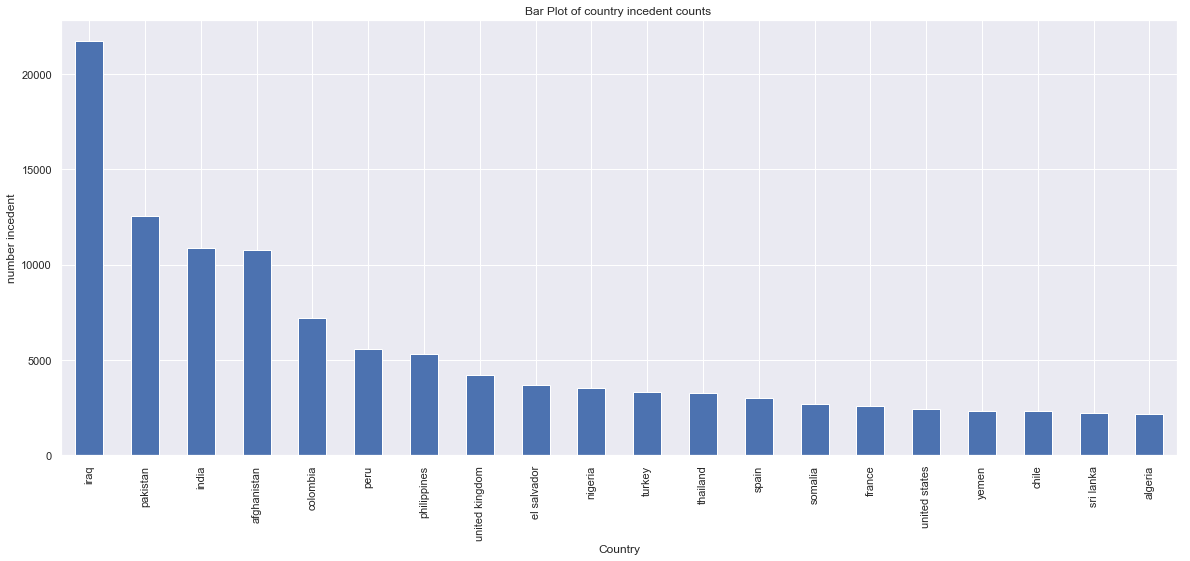

In [52]:
#Bar plot
counts = mydata['country_txt'].value_counts()
fig = plt.figure(figsize=(20,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of country incedent counts ')
ax.set_xlabel('Country')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number incedent')

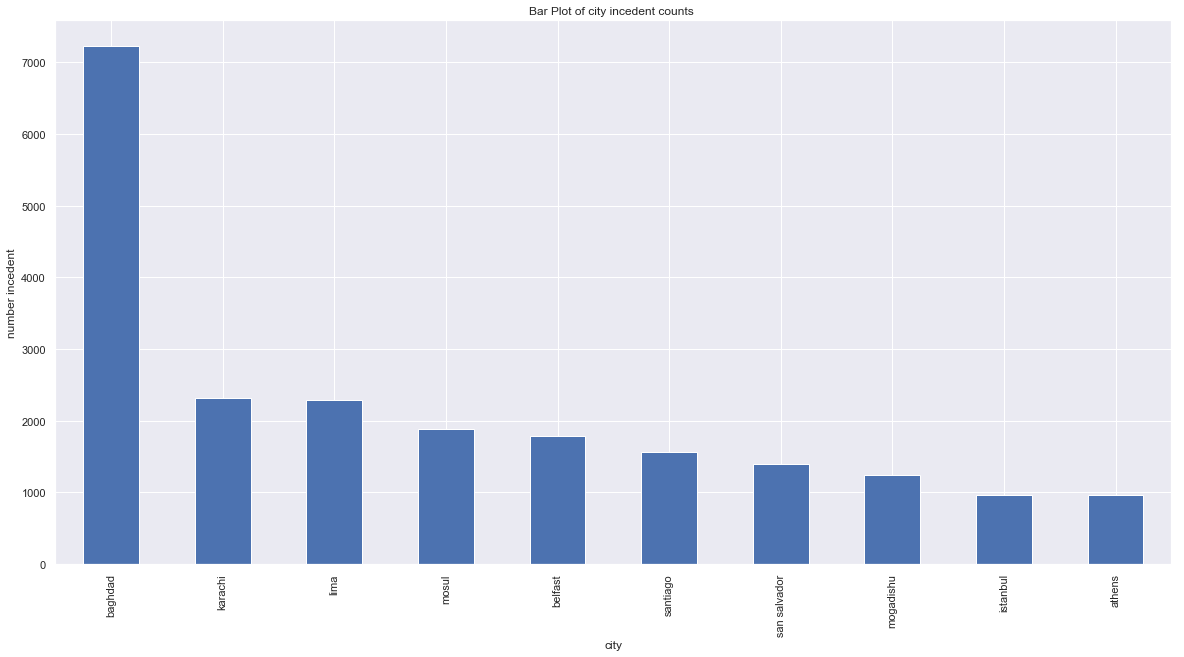

In [53]:
mydatag = mydata[mydata.city != 'unknown']
counts = mydatag['city'].value_counts().nlargest(10)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of city incedent counts ')
ax.set_xlabel('city')
ax.set_ylabel('number incedent')

In [27]:
# which country has top attcks pe per year
d = pd.DataFrame({'count' : mydata.groupby(['iyear' ,'country_txt']).size()}).reset_index()
max = d.iloc[d.groupby(['iyear']).apply(lambda x: x['count'].idxmax())]
max = pd.DataFrame(max)
max = pd.DataFrame(max.sort_values(by=['iyear']))

In [28]:
max

,iyear,country_txt,count
29,1970,united states,362
60,1971,united states,216
100,1972,united kingdom,170
141,1973,united kingdom,121
187,1974,united kingdom,156
228,1975,united kingdom,156
255,1976,italy,170
310,1977,italy,291
366,1978,italy,273
417,1979,el salvador,307


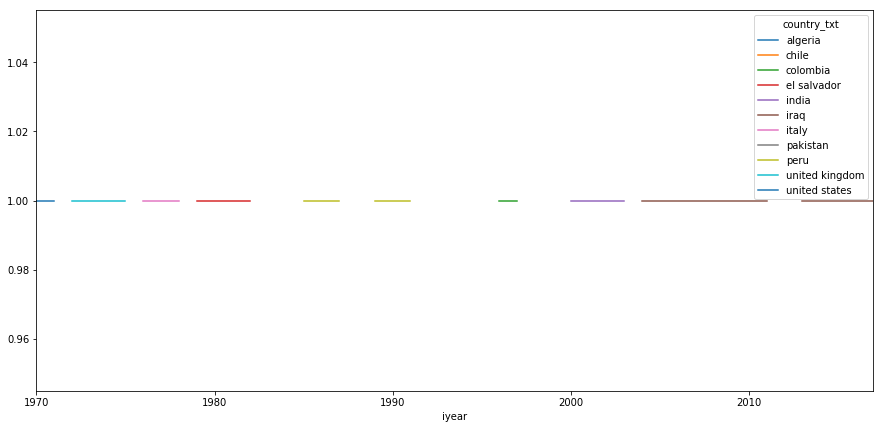

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
max.groupby(['iyear','country_txt']).count()['count'].unstack().plot(ax=ax)


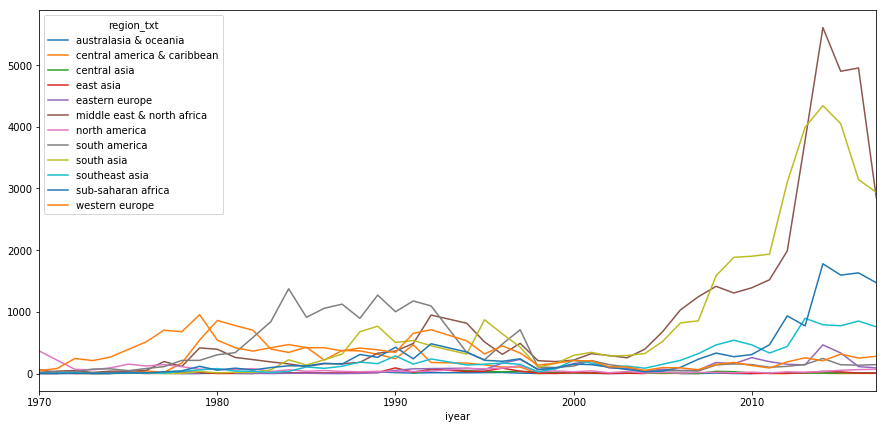

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby(['iyear','region_txt']).count()['success'].unstack().plot(ax=ax)

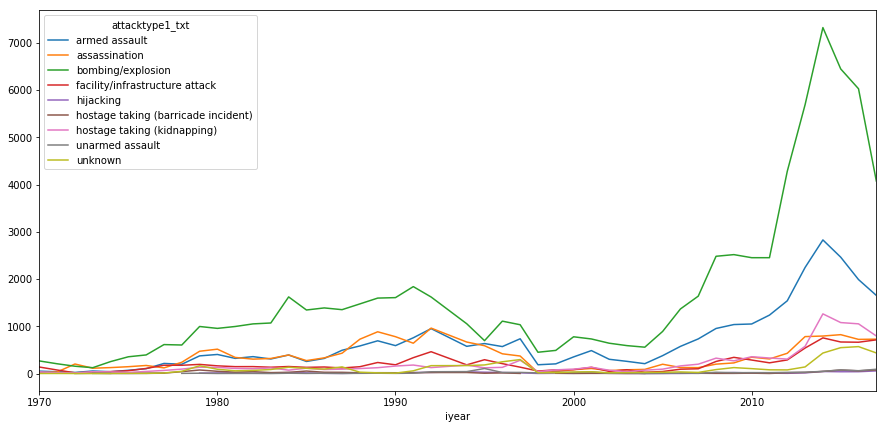

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby(['iyear','attacktype1_txt']).count()['success'].unstack().plot(ax=ax)

(1970, 2017)

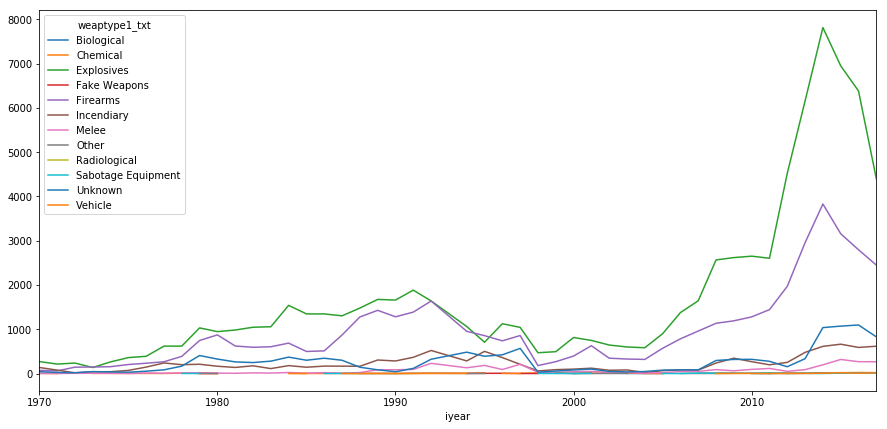

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby(['iyear','weaptype1_txt']).count()['success'].unstack().plot(ax=ax)
ax.set_xlim(1970 , 2017)

(1970, 2017)

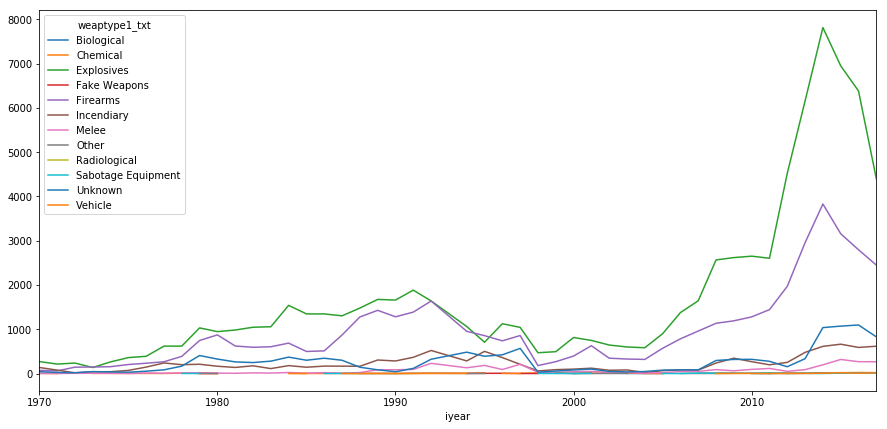

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby(['iyear','weaptype1_txt']).count()['nkill'].unstack().plot(ax=ax)
ax.set_xlim(1970 , 2017)

Text(0, 0.5, 'nkill')

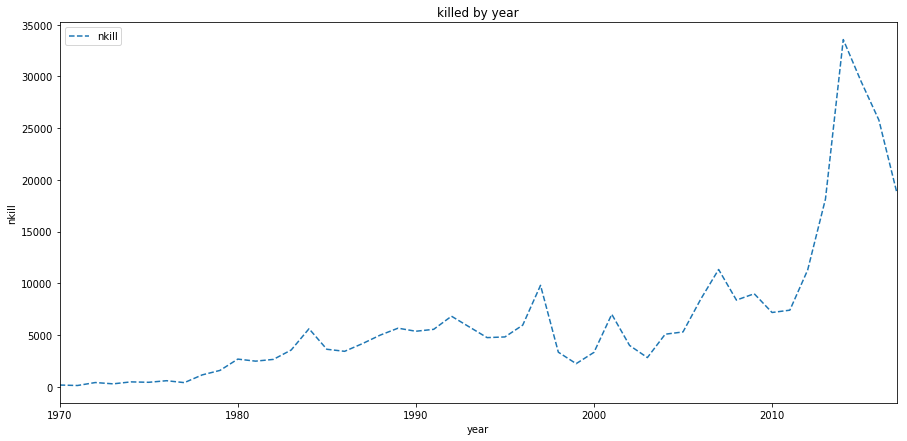

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['nkill'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='killed by year')
ax.set_xlabel("year")
ax.set_ylabel("nkill")

Text(0, 0.5, 'nwound')

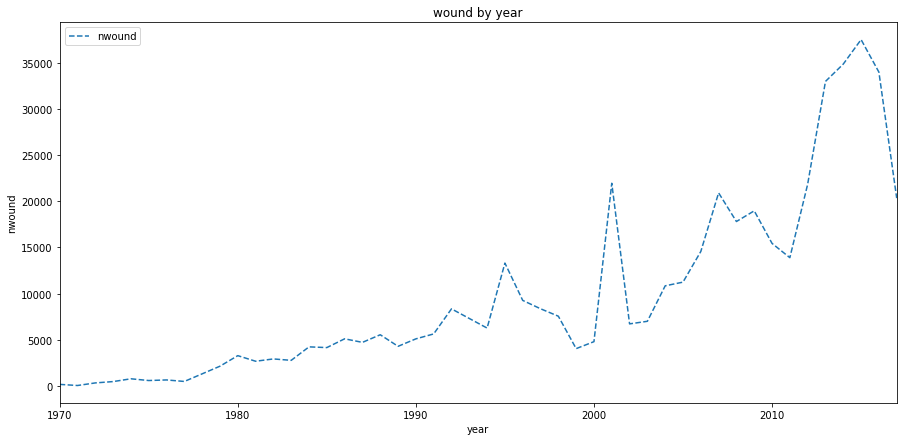

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['nwound'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='wound by year')
ax.set_xlabel("year")
ax.set_ylabel("nwound")

Text(0, 0.5, 'nkill / nwound')

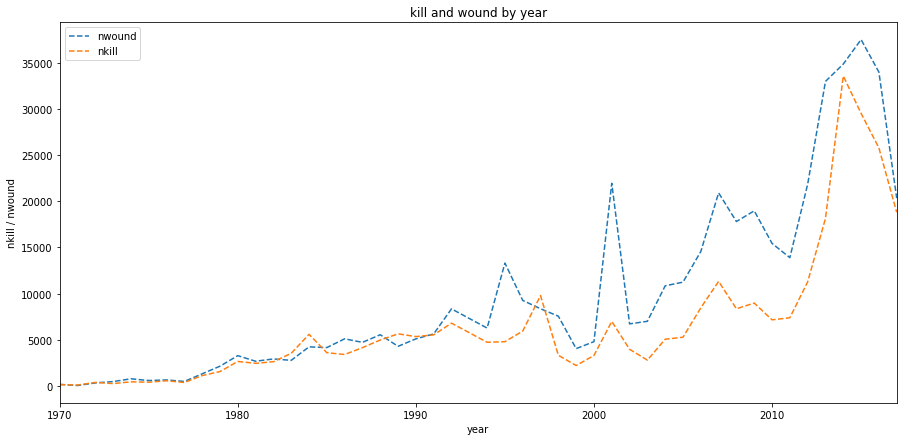

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['nwound'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='kill and wound by year')
mydata.groupby('iyear', as_index=False)['nkill'].sum().plot.line(ax = ax , x='iyear' , style ='--' )
                                                                 
ax.set_xlabel("year")
ax.set_ylabel("nkill / nwound")

Text(0, 0.5, 'suicide')

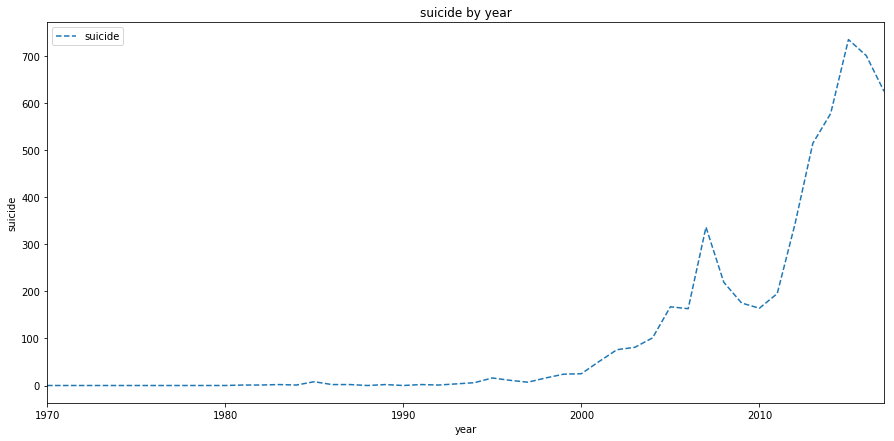

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('iyear', as_index=False)['suicide'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='suicide by year')
ax.set_xlabel("year")
ax.set_ylabel('suicide')

In [38]:
mydatatemp = mydata
mydatatemp['ncasualties'] = mydatatemp['nkill'] + mydatatemp['nwound']

Text(0, 0.5, 'ncasualties')

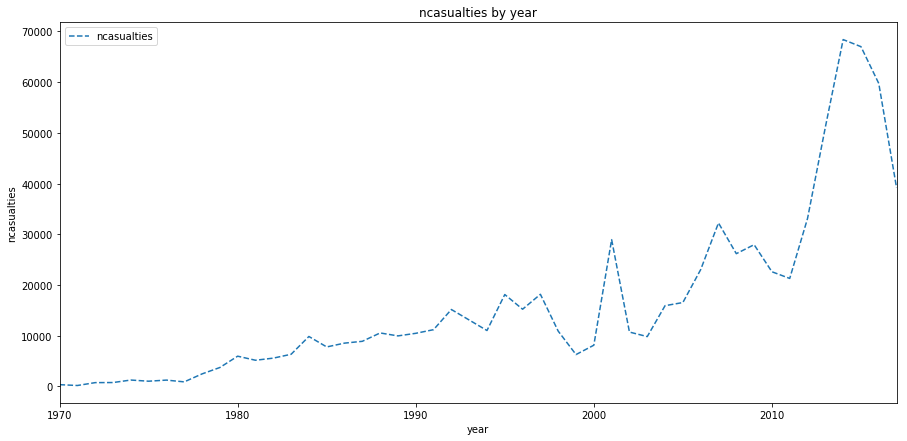

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('iyear', as_index=False)['ncasualties'].sum().plot.line(ax = ax , x='iyear' , style ='--' ,
                                                                 title='ncasualties by year')
ax.set_xlabel("year")
ax.set_ylabel('ncasualties')

In [40]:
mydata2001=mydata[mydata['iyear']==2001]
mydata2001.sort_values(by=['ncasualties'] , ascending=False).head(1)

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,dbsource,ncasualties
73127,2.001090e+11,2001,9,11,0,09/11/2001: this was one of four related attac...,1,1,1,0.0,...,1.0,0.0,0,1,0,1,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...",CETIS,9574


In [68]:
mydata2014=mydata[mydata['iyear']==2014]
mydata2014.sort_values(by=['ncasualties'] , ascending=False).head(5)

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,dbsource,ncasualties
136283,2.014080e+11,2014,8,3,1,08/03/2014: assailants attacked yizidi civilia...,1,1,1,0.0,...,1.0,0.0,0,1,0,1,"""Freed From ISIS, Yazidi Women Return in 'Seve...","""Dozens of Yazidi women 'sold into marriage' b...",START Primary Collection,953
130420,2.014040e+11,2014,4,15,0,04/15/2014: assailants attacked a mosque being...,1,1,1,0.0,...,1.0,0.0,0,1,0,1,"""UN confirms hundreds slaughtered in S.Sudan a...","""S.Sudan Rebels Slaughter 'Hundreds' In Ethnic...",START Primary Collection,687
133225,2.014060e+11,2014,6,10,0,06/10/2014: assailants stormed badush prison i...,1,1,1,0.0,...,0.0,NaN,0,1,0,1,"""Jihadists seize Iraq's Nineveh province,"" Age...","""Rebels seize control of Iraq's Nineveh,"" Al J...",START Primary Collection,670
136561,2.014080e+11,2014,8,15,1,08/15/2014: assailants attacked yizidi civilia...,1,1,1,0.0,...,1.0,0.0,0,1,0,1,"""Freed From ISIS, Yazidi Women Return in 'Seve...","""ISIS strikes Iraq village, kills Yazidis, off...",START Primary Collection,400
140977,2.014110e+11,2014,11,28,0,11/28/2014: two suicide bombers and a roadside...,1,1,1,0.0,...,0.0,NaN,0,0,0,0,"""Nigeria: Kano mosque blasts death toll above ...","""Nigerian mosque attack death toll climbs ...",START Primary Collection,392


In [69]:
mydata2015=mydata[mydata['iyear']==2015]
mydata2015.sort_values(by=['ncasualties'] , ascending=False).head(5)

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,dbsource,ncasualties
153580,2.015090e+11,2015,9,28,1,"09/28/2015: assailants raided kunduz city, afg...",1,1,1,0.0,...,0.0,NaN,0,0,0,0,"""Taliban expands fight beyond Afghanistan's Ku...","""Taliban attack on Afghan city of Kunduz lasts...",START Primary Collection,536
151527,2.015080e+11,2015,8,7,0,08/07/2015: a suicide bomber detonated an expl...,1,1,1,0.0,...,0.0,NaN,0,0,0,0,"""Taliban rejects involvement in Kabul truck bo...","""Pakistan's ISI behind deadly attacks in Kabul...",START Primary Collection,416
149783,2.015060e+11,2015,6,25,0,06/25/2015: assailants detonated an explosives...,1,1,1,0.0,...,0.0,NaN,0,1,0,1,"""Kurds oust IS from Syria's Kobane as civilian...","""Kurds secure Syria's Kobani after Islamic Sta...",START Primary Collection,375
154029,2.015100e+11,2015,10,10,0,10/10/2015: two suicide bombers detonated at a...,1,1,1,0.0,...,0.0,NaN,0,1,0,1,"""Turkey's Erdogan sees Syrian intelligence, Is...","""Death toll up to 102 in Ankara train station ...",START Primary Collection,350
155389,2.015110e+11,2015,11,13,0,11/13/2015: three suicide bombers opened fire ...,1,1,1,0.0,...,1.0,0.0,1,1,1,1,"""For Survivors of Paris Attacks, Mental Scars ...","""In Memoriam: Paris Terror Attacks,"" CNN, Nove...",START Primary Collection,310


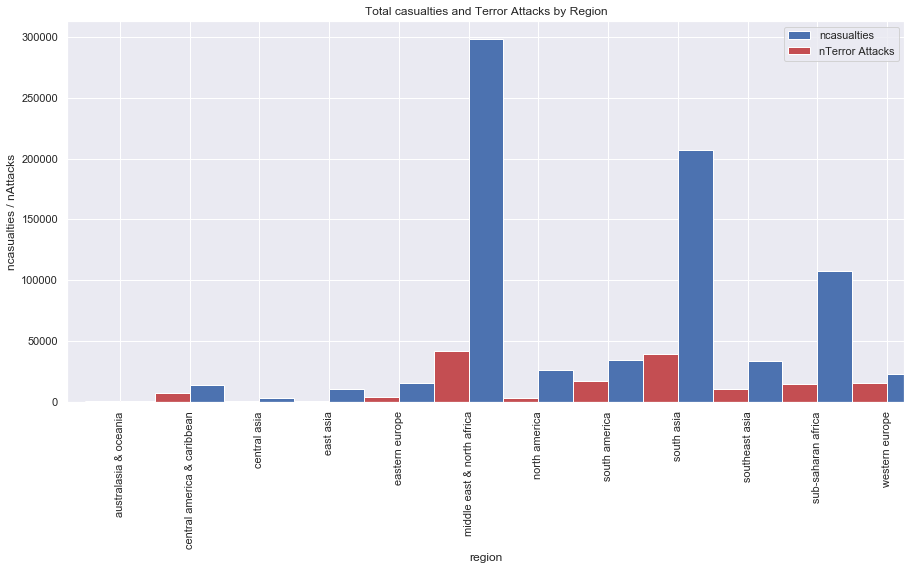

In [70]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('region_txt', as_index=False)['ncasualties'].sum().plot(kind='bar', color='b', ax=ax, position= 0)
                                                           
mydatatemp.groupby('region_txt')['region_txt'].count().plot(kind='bar', color='r', ax=ax, position= 1 ,
                                                            title = "Total casualties and Terror Attacks by Region")


ax.set_xlabel("region")
ax.set_ylabel("ncasualties / nAttacks")
ax.legend(['ncasualties', 'nTerror Attacks'])

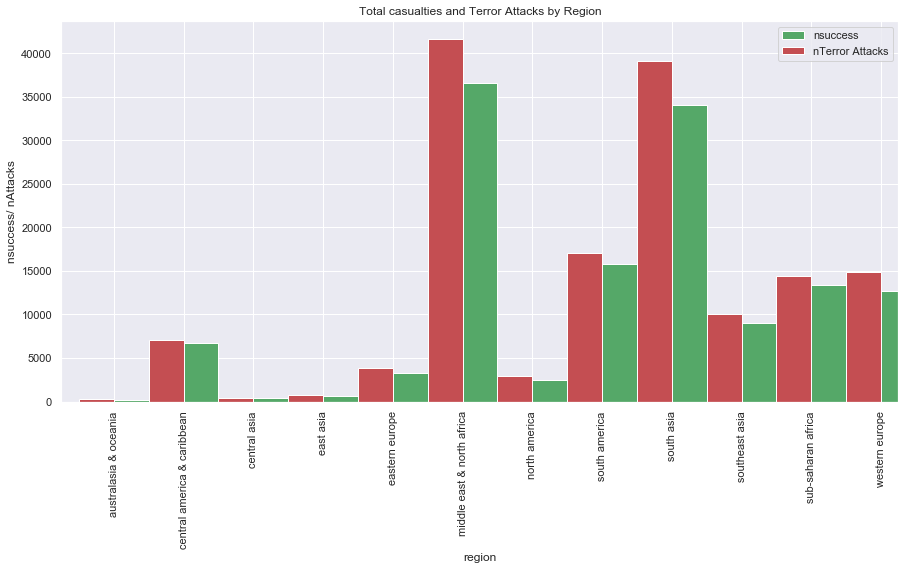

In [71]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('region_txt', as_index=False)['success'].sum().plot(kind='bar', color='g', ax=ax, position= 0)
                                                           
mydatatemp.groupby('region_txt')['region_txt'].count().plot(kind='bar', color='r', ax=ax, position =1 ,title = "Total casualties and Terror Attacks by Region")  

ax.set_xlabel("region")
ax.set_ylabel("nsuccess/ nAttacks")
ax.legend(['nsuccess', 'nTerror Attacks'])

Text(0, 0.5, 'number incedent')

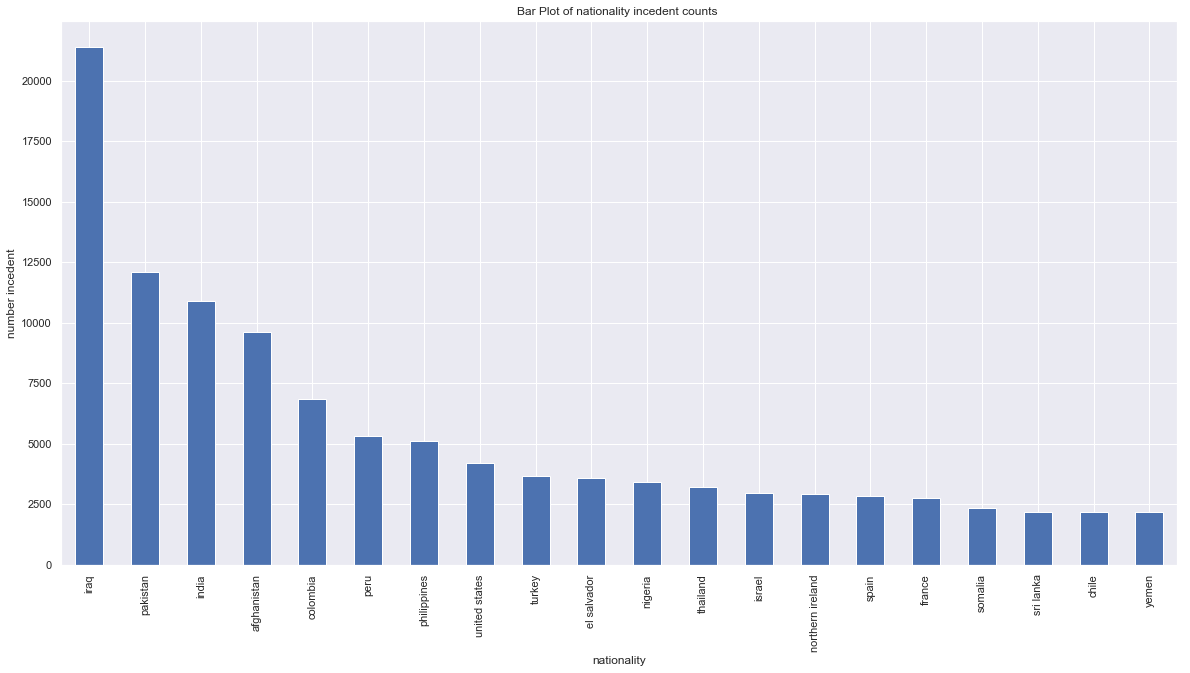

In [72]:
counts = mydata.groupby('natlty1_txt')['natlty1_txt'].count().nlargest(20)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of nationality incedent counts ')
ax.set_xlabel('nationality')
ax.set_ylabel('number incedent')

In [73]:
target_nationality = mydata.groupby('natlty1_txt')['natlty1_txt'].count().nlargest(20)
target_nationality

natlty1_txt
iraq                21392
pakistan            12114
india               10885
afghanistan          9631
colombia             6856
peru                 5337
philippines          5134
united states        4190
turkey               3671
el salvador          3580
nigeria              3401
thailand             3207
israel               2967
northern ireland     2909
spain                2849
france               2767
somalia              2325
sri lanka            2184
chile                2178
yemen                2175
Name: natlty1_txt, dtype: int64

Text(0, 0.5, 'number incedent')

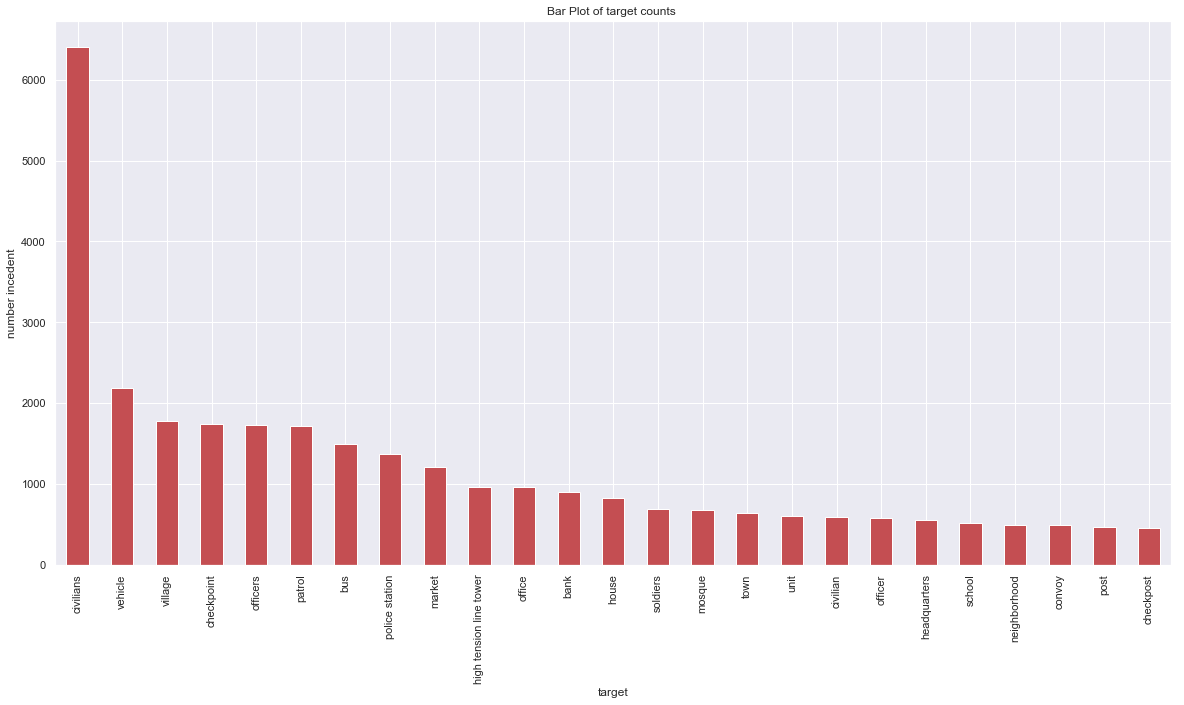

In [74]:
mydatag = mydata[mydata.target1 != 'unknown']
counts = mydatag['target1'].value_counts().nlargest(25)
fig = plt.figure(figsize=(20,10))
ax =fig.gca()
counts.plot.bar(ax = ax , color='r')
ax.set_title('Bar Plot of target counts ')
ax.set_xlabel('target')
ax.set_ylabel('number incedent')

In [75]:
target = mydatag['target1'].value_counts().nlargest(25)
target

civilians                  6410
vehicle                    2182
village                    1777
checkpoint                 1743
officers                   1723
patrol                     1717
bus                        1495
police station             1369
market                     1206
high tension line tower     959
office                      958
bank                        896
house                       823
soldiers                    686
mosque                      676
town                        633
unit                        596
civilian                    590
officer                     576
headquarters                551
school                      515
neighborhood                487
convoy                      486
post                        463
checkpost                   456
Name: target1, dtype: int64

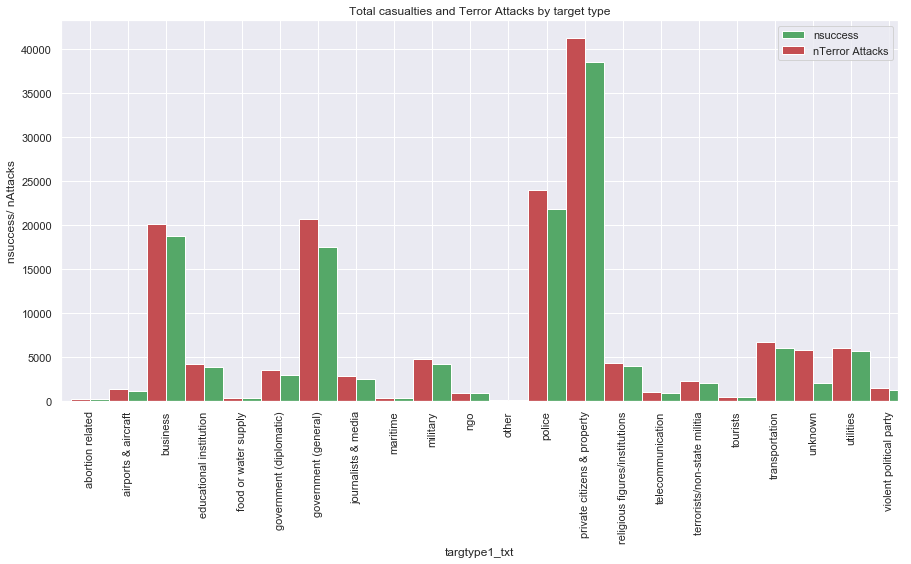

In [76]:
fig, ax = plt.subplots(figsize=(15,7))
mydata.groupby('targtype1_txt', as_index=False)['success'].sum().plot(kind='bar', color='g', ax=ax, position= 0)
                                                           
mydatatemp.groupby('targtype1_txt')['targtype1_txt'].count().plot(kind='bar', color='r', ax=ax, position =1,title = "Total casualties and Terror Attacks by target type")  

ax.set_xlabel("targtype1_txt")
ax.set_ylabel("nsuccess/ nAttacks")
ax.legend(['nsuccess', 'nTerror Attacks'])

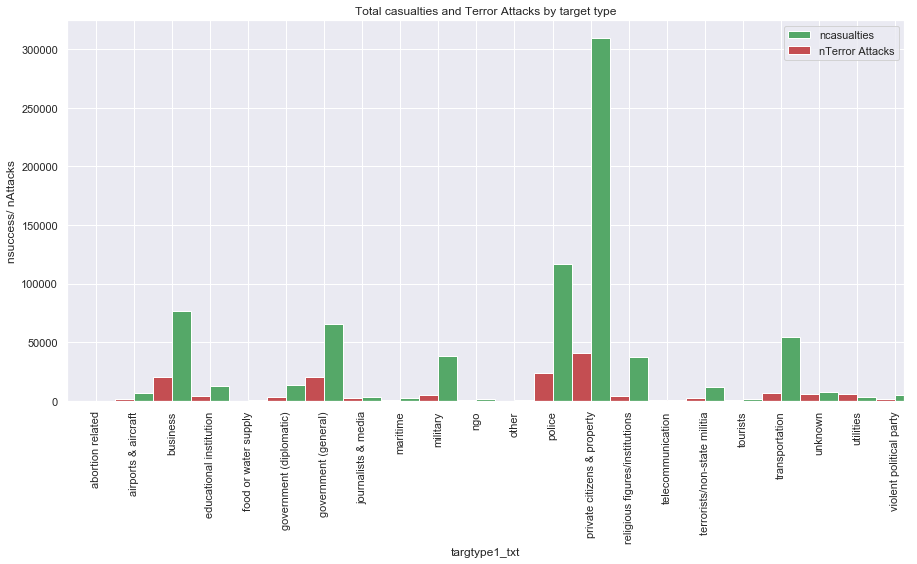

In [77]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('targtype1_txt', as_index=False)['ncasualties'].sum().plot(kind='bar', color='g', ax=ax, position= 0)
                                                           
mydatatemp.groupby('targtype1_txt')['targtype1_txt'].count().plot(kind='bar', color='r', ax=ax, position =1 ,title = "Total casualties and Terror Attacks by target type")  

ax.set_xlabel("targtype1_txt")
ax.set_ylabel("nsuccess/ nAttacks")
ax.legend(['ncasualties', 'nTerror Attacks'])

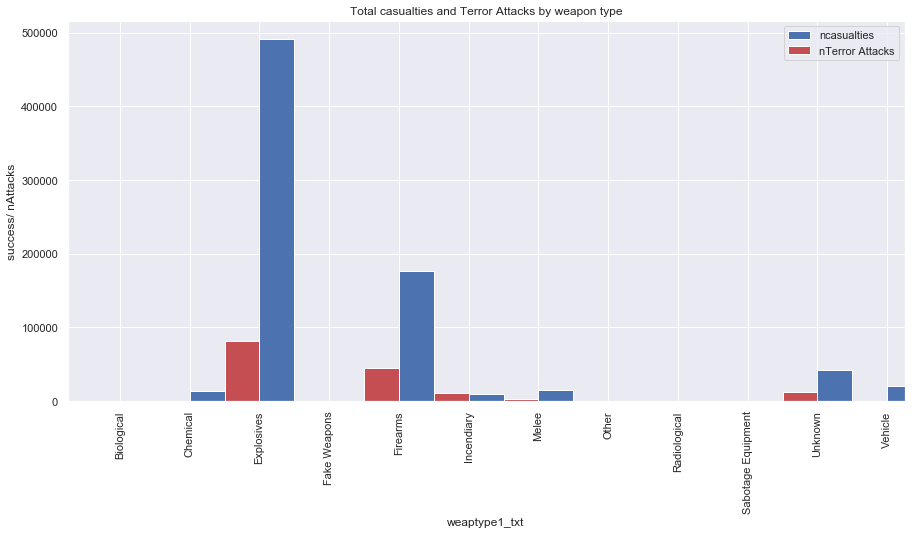

In [78]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('weaptype1_txt', as_index=False)['ncasualties'].sum().plot(kind='bar', color='b', ax=ax, position= 0)
                                                       
mydatatemp.groupby('weaptype1_txt')['weaptype1_txt'].count().plot(kind='bar', color='r', ax=ax, position =1 ,title = "Total casualties and Terror Attacks by weapon type")  

ax.set_xlabel("weaptype1_txt")
ax.set_ylabel("success/ nAttacks")
ax.legend(['ncasualties', 'nTerror Attacks'])

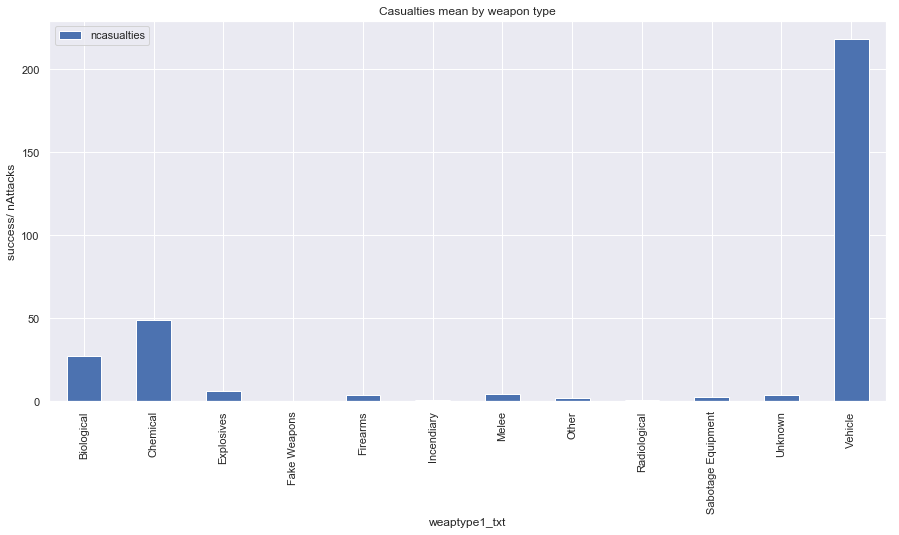

In [79]:
fig, ax = plt.subplots(figsize=(15,7))
mydatatemp.groupby('weaptype1_txt', as_index=True)['ncasualties'].mean().plot(kind='bar', color='b', ax=ax, title = "Casualties mean by weapon type")
                                                   

ax.set_xlabel("weaptype1_txt")
ax.set_ylabel("success/ nAttacks")
ax.legend(['ncasualties'])

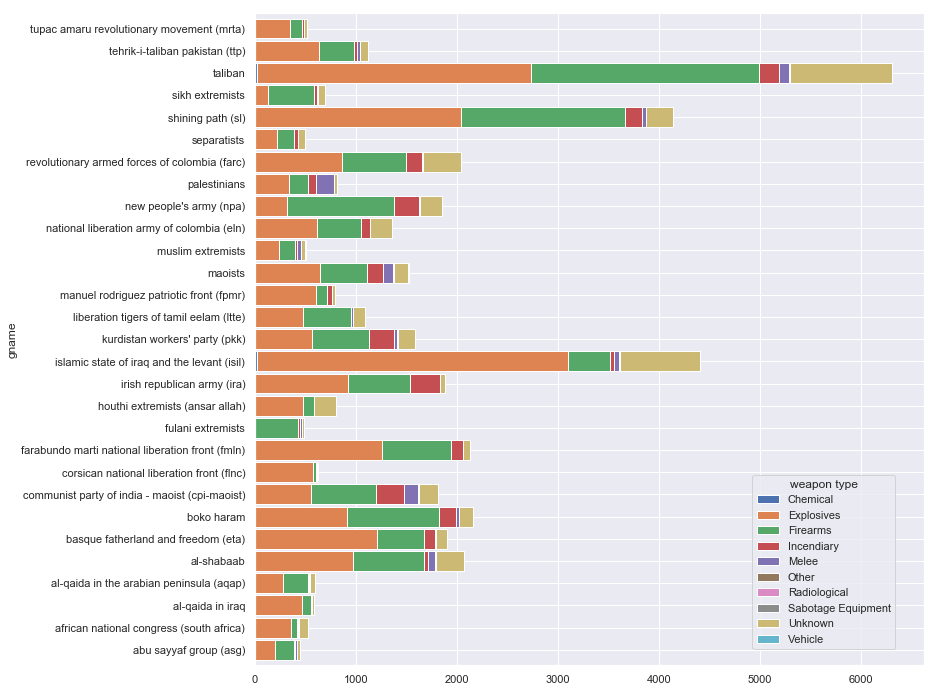

In [80]:
mydatatemp1=mydatatemp[mydatatemp['gname'].isin(mydatatemp['gname'].value_counts()[1:30].index)]
pd.crosstab(mydatatemp1['gname'],mydatatemp1['weaptype1_txt']).plot.barh(stacked=True,figsize=(12,12),width=0.9)
plt.legend(loc=9,bbox_to_anchor=(0.85,0.3) , title='weapon type')

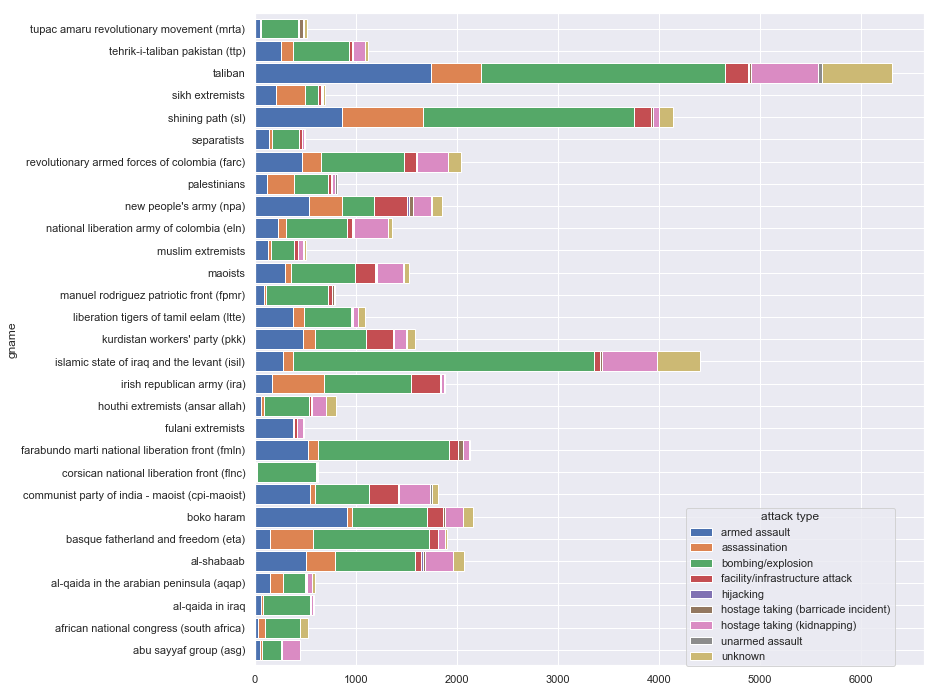

In [81]:
pd.crosstab(mydatatemp1['gname'],mydatatemp1['attacktype1_txt']).plot.barh(stacked=True,figsize=(12,12),width=0.9)
plt.legend(loc=9,bbox_to_anchor=(0.8,0.25),title='attack type')

#### Time Series analysis

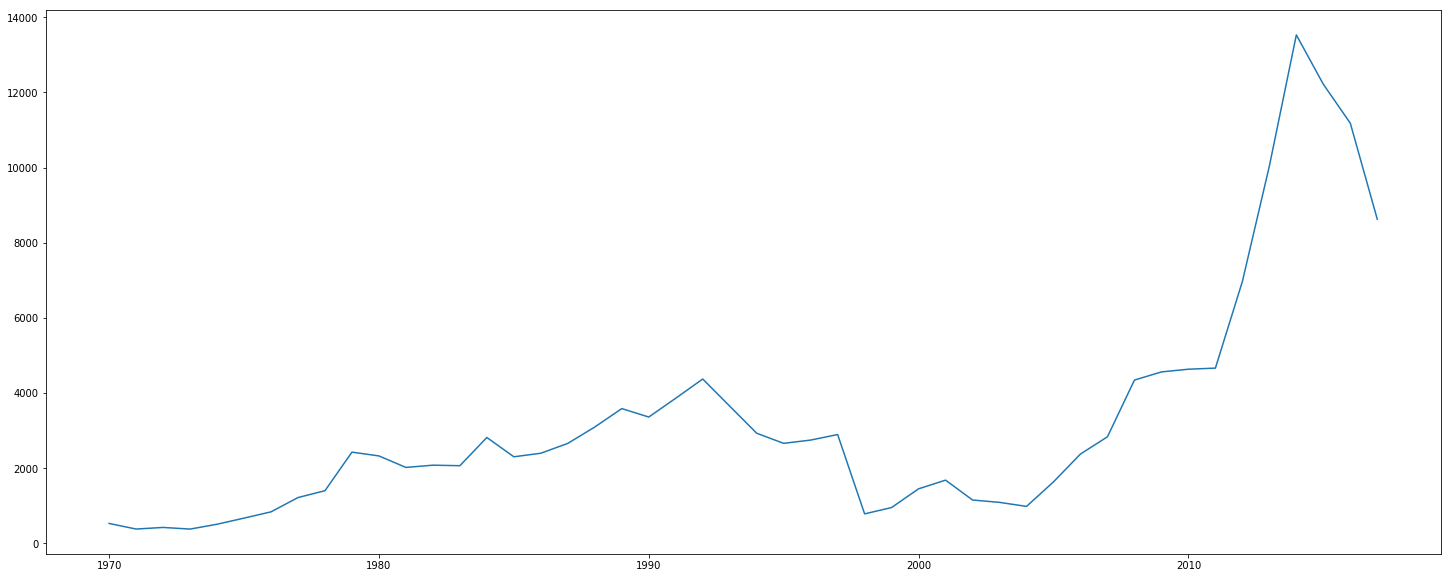

In [41]:
fig = plt.figure(figsize=(25,10))
TS = mydata.groupby('iyear', as_index=False)['success'].count()
plt.plot(TS['iyear'],TS['success'])

In [83]:
TS.head()

,iyear,success
0,1970,528
1,1971,379
2,1972,422
3,1973,378
4,1974,507


In [84]:
TS1 = TS.set_index('iyear')
TS1.head()

,success
iyear,
1970,528
1971,379
1972,422
1973,378
1974,507


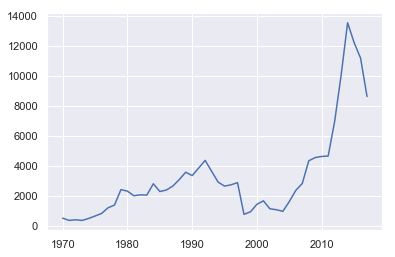

In [85]:
plt.plot(TS1)

In [86]:
from statsmodels.tsa.arima_model import ARIMA

In [87]:
X=TS1.success

In [88]:
X.shape

(47,)

In [89]:
train = X[0:20]
test = X[20:]

In [90]:
train.shape

(20,)

In [91]:
test.shape

(27,)

In [92]:
#Find the best parmaters pdq
import warnings
warnings.filterwarnings("ignore")
import  itertools

In [93]:
p = d = q  = range(0,5)
pdq=list(itertools.product(p,d,q))

In [94]:
score=[]
for param in pdq:
    try:
        model_arima = ARIMA(train, order =param)
        model_arima_fit = model_arima.fit()
        #print(param ,model_arima_fit.aic)
        score.append(model_arima_fit.aic)
    except:
        continue

In [95]:
min(score)

270.81305451946884

In [96]:
#Now train the model ARIMA with the best param (p=0 , d= 2 , q= 1)
model_arima = ARIMA(train, order =(0,2,1))

In [97]:
model_arima_fit = model_arima.fit()

In [98]:
pred = model_arima_fit.forecast(steps=34)[0]
pred

array([ 3857.00030661,  4141.32338496,  4437.96923506,  4746.93785692,
        5068.22925052,  5401.84341588,  5747.78035298,  6106.04006183,
        6476.62254243,  6859.52779479,  7254.75581889,  7662.30661474,
        8082.18018234,  8514.37652169,  8958.89563279,  9415.73751564,
        9884.90217025, 10366.38959659, 10860.19979469, 11366.33276454,
       11884.78850614, 12415.56701949, 12958.66830459, 13514.09236144,
       14081.83919004, 14661.90879038, 15254.30116248, 15859.01630633,
       16476.05422192, 17105.41490927, 17747.09836837, 18401.10459921,
       19067.43360181, 19746.08537615])

In [99]:
import datetime
year = datetime.datetime.today().year
y=[]
for i in range (-29,5):
    y.append(year+i)
print(y)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [100]:
len(y)

34

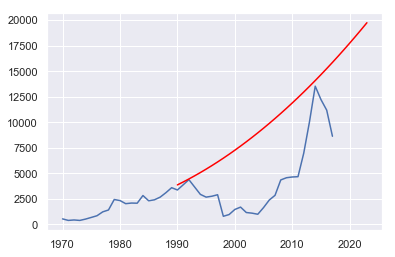

In [101]:
#y=TS.iloc[40:,0]
#plt.plot(test)
plt.plot(TS1)
plt.plot ( y, pred , color = 'red')

#### Correlation analysis

In [102]:
#Read world population 1970 to 2010 dataframe (1993 removed to match the terrorism dataset)
pop = pd.read_csv('../code/pop.csv', encoding='ISO-8859-1')

In [103]:
pop.head()

,Year,World_Population,Yearly_change,Net_change,Density_(P/Km2),Urban_Pop,Urban_Pop_precnt
0,1970,3700577650,2.06%,"74,672,136",25,"1,350,280,789",36%
1,1971,3775790900,2.03%,"75,213,250",25,"1,385,012,179",37%
2,1972,3851545181,2.01%,"75,754,281",26,"1,420,942,101",37%
3,1973,3927538695,1.97%,"75,993,514",26,"1,458,374,024",37%
4,1974,4003448151,1.93%,"75,909,456",27,"1,497,305,961",37%


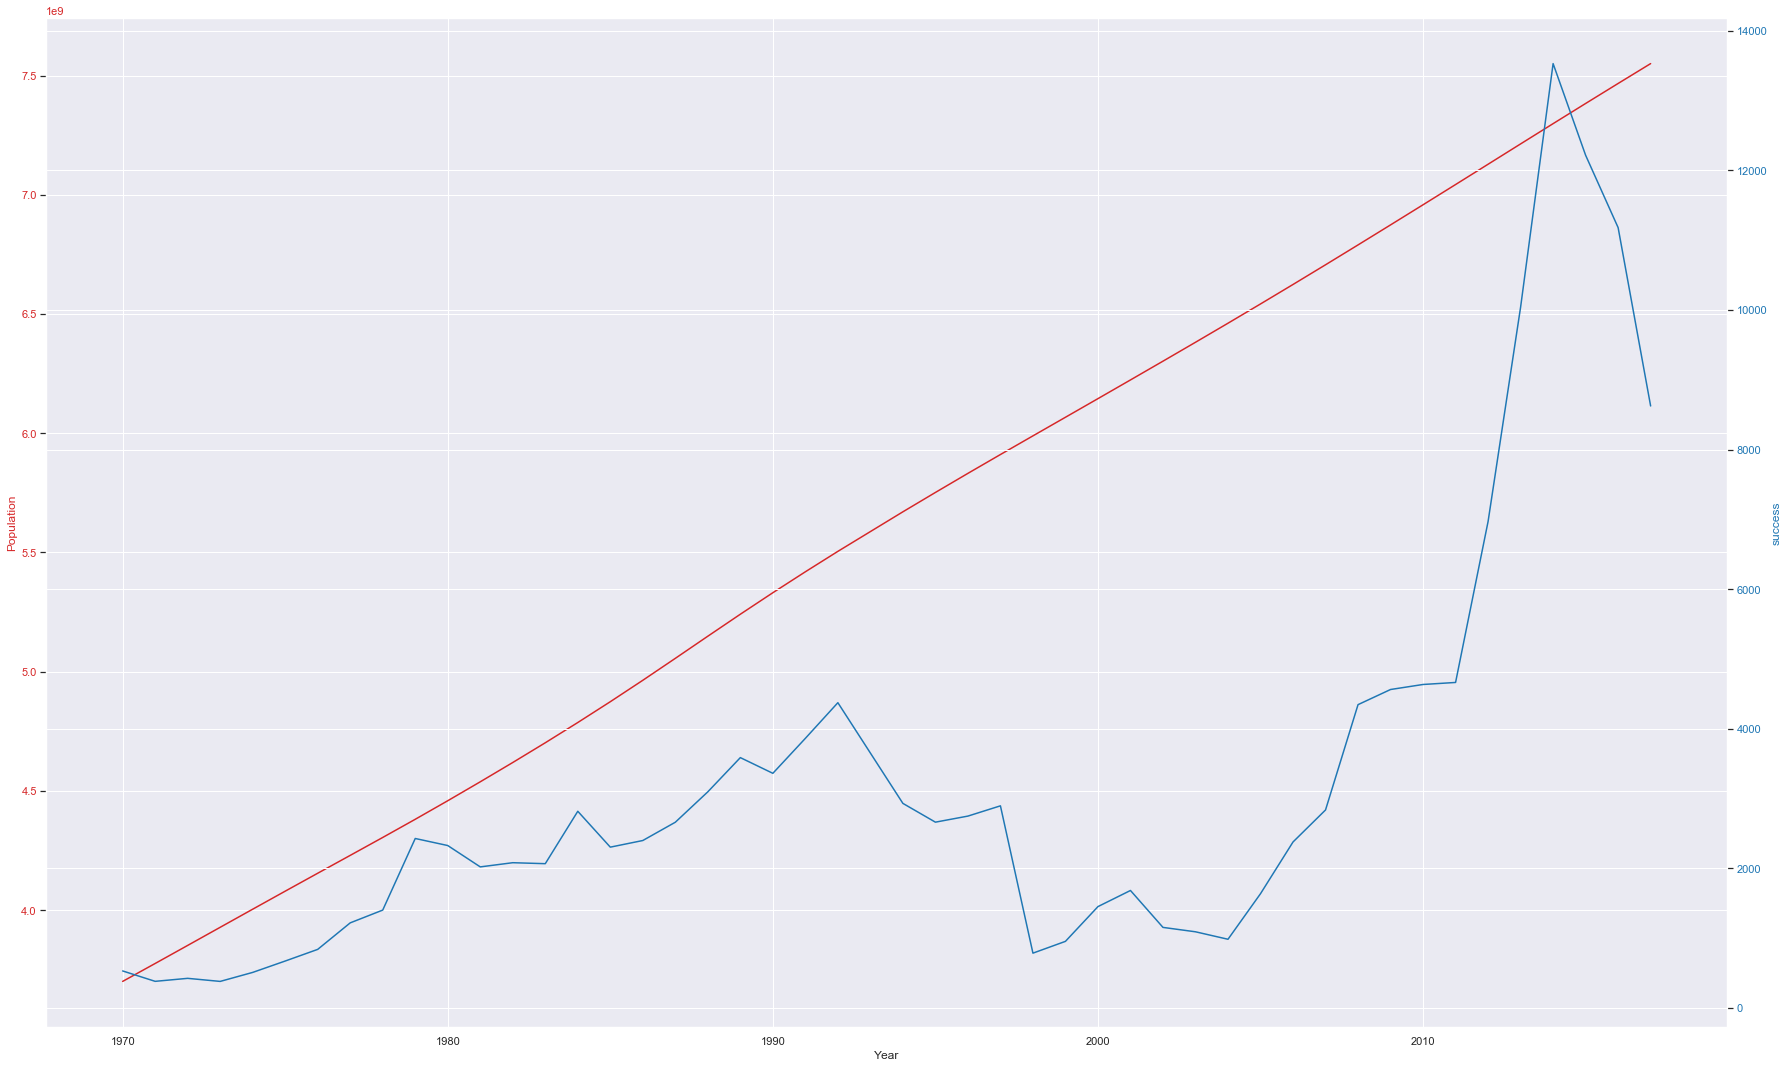

In [104]:
fig, ax1 = plt.subplots(figsize=(25,15))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(pop['Year'],pop['World_Population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('success', color=color)  # we already handled the x-label with ax1
ax2.plot(TS['iyear'],TS['success'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [105]:
from scipy.stats import pearsonr
corr, p = pearsonr(pop['World_Population'] , TS['success'])
corr

0.6799586468612617

In [106]:
#Read world internet users 1970 to 2010 dataframe (1993 removed to match the terrorism dataset)
inter = pd.read_csv('../code/inter.csv', encoding='ISO-8859-1')

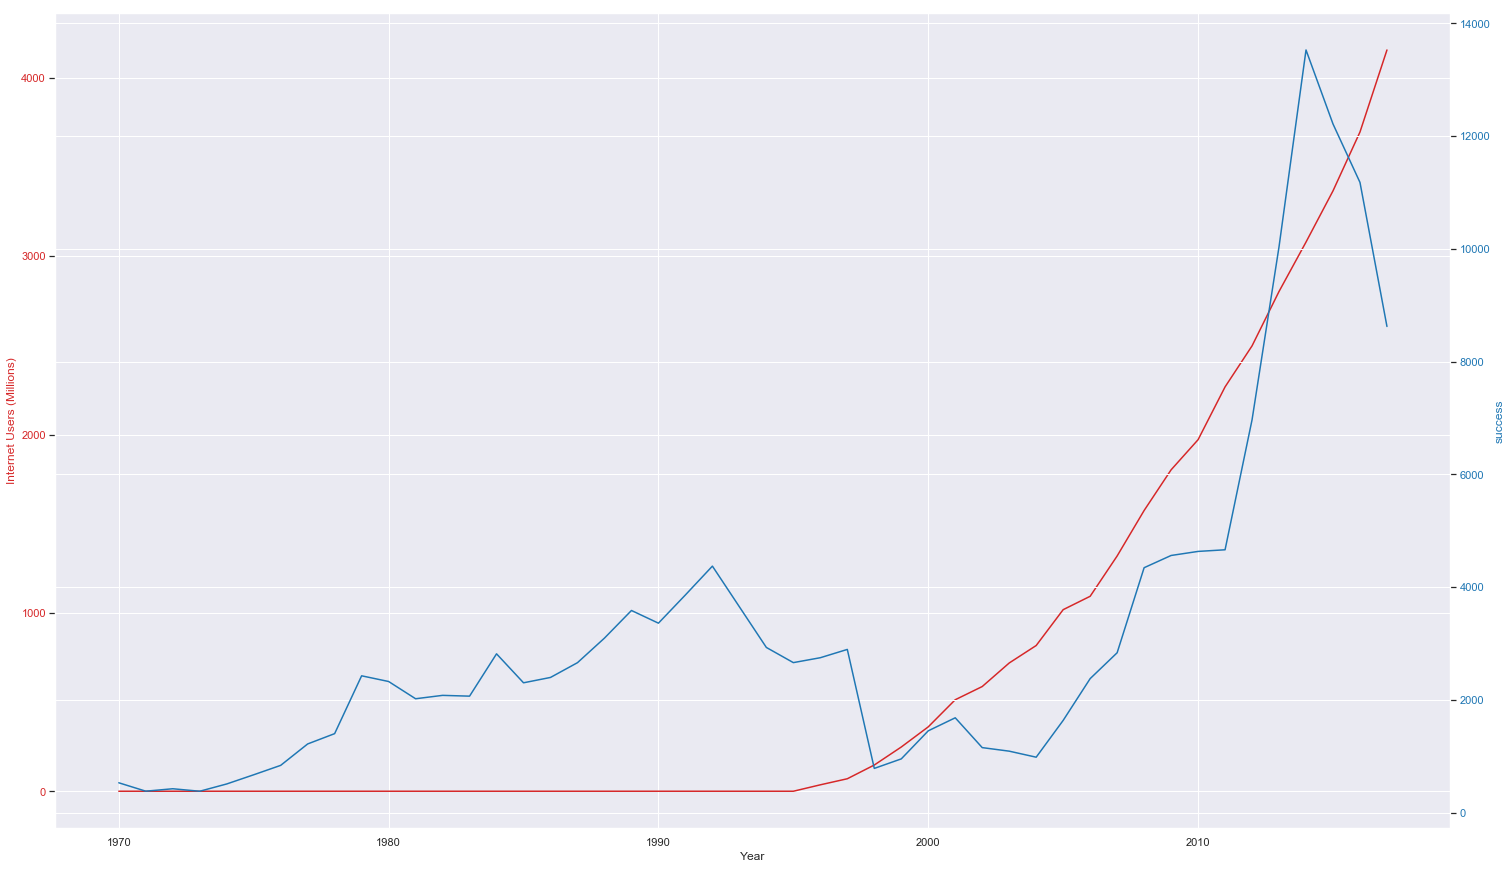

In [107]:
ig, ax1 = plt.subplots(figsize=(25,15))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Internet Users (Millions)', color=color)
ax1.plot(inter['Year'],inter['users_millions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('success', color=color)  # we already handled the x-label with ax1
ax2.plot(TS['iyear'],TS['success'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [108]:
from scipy.stats import pearsonr
corr, p = pearsonr(inter['users_millions'] , TS['success'])
corr

0.8502950854970417

## Dimensionality Reduction

remove attributs with too many missing values
remove attributis with zero or very low varince
remove one of the attribits with high correlations with other - prefer the one with more missing values or lower varince
Feature selection(decide on the importance of the attribute using statstical measures like information gain or Geni index) (Forward selection and backward elemination) 
Feature extraction (reduce dimensions by transformation PCA princibal complnet anaylsis or Linear dircrminate analysis)


##### Remove low or No Varince
since crit1, crit2, crit3 and doubtterr is set to one value after filtering i.e varince = 0 for all of them we can elminate the attributes since no value added and no future use 

In [109]:
mydata['crit1'].describe()

count    152622.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit1, dtype: float64

In [110]:
mydata['crit2'].describe()

count    152622.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit2, dtype: float64

In [111]:
mydata['crit3'].describe()

count    152622.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit3, dtype: float64

In [112]:
mydata['crit1'].describe()

count    152622.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit1, dtype: float64

In [113]:
mydata['doubtterr'].describe()

count    152622.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: doubtterr, dtype: float64

In [114]:
list1 = ['crit1' , 'crit2' , 'crit3' , 'doubtterr']

In [115]:
mydata.shape

(152622, 66)

In [116]:
mydata = mydata.drop(list1,axis=1)

In [117]:
mydata.shape

(152622, 62)

In [118]:
#mydata

In [119]:
# remove attributes USA spesefic which will not be used in this study
# 'nkillus' , 'nwoundus' , 'nhostkidus' , 'ransomamtus' , 'ransompaidus'
list1 = ['nkillus' , 'nwoundus' ]

In [120]:
mydata = mydata.drop(list1,axis=1)

In [121]:
mydata.shape

(152622, 60)

In [125]:
# remove the additional infromation attributes which will not add value in this study
#'addnotes' , 'INT_LOG' , 'INT_IDEO' , 'INT_MISC', 'INT_ANY' , 'scite1' , 'scite2', 'scite3' ,'dbsource'
list1 = ['INT_LOG' , 'INT_IDEO' , 'INT_MISC', 'INT_ANY' , 'scite1' , 'scite2', 'dbsource']


In [126]:
mydata = mydata.drop(list1,axis=1)

In [127]:
mydata.shape

(152622, 53)

In [128]:
list_col = mydata.columns

In [129]:
list_col

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'summary', 'multiple',
       'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'vicinity', 'location', 'latitude', 'longitude', 'specificity',
       'attacktype1', 'attacktype1_txt', 'success', 'suicide', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'motive', 'nkill',
       'nkillter', 'nwound', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propcomment', 'ishostkid', 'ransom', 'ncasualties'],
      dtype='object')

In [130]:
#Remove highly corrleated attribuite and Duplicates (for categorial keep the txt attribuites only )
#for example remove country and keep country_txt 

In [131]:
lb = LabelEncoder()
mydata['country_txt'] = lb.fit_transform(mydata['country_txt'])
mydata['country'].corr(mydata['country_txt'])

0.726336883222366

In [132]:
# list to drop
list2 = ['eventid','summary','country' , 'region' ,'location','specificity','attacktype1', 'weaptype1' , 'weapsubtype1' , 'weapsubtype1_txt', 
         'weapdetail','targtype1','targsubtype1', 'targsubtype1_txt','natlty1','guncertain1' , 'individual' , 
         'propextent', 'propextent_txt', 'propcomment' ,'ransom' ,'motive','corp1']

In [133]:
mydata = mydata.drop(list2,axis=1)

In [134]:
list_col = mydata.columns
list_col

Index(['iyear', 'imonth', 'iday', 'extended', 'multiple', 'country_txt',
       'region_txt', 'provstate', 'city', 'vicinity', 'latitude', 'longitude',
       'attacktype1_txt', 'success', 'suicide', 'weaptype1_txt',
       'targtype1_txt', 'target1', 'natlty1_txt', 'gname', 'nperps',
       'nperpcap', 'claimed', 'nkill', 'nkillter', 'nwound', 'nwoundte',
       'property', 'ishostkid', 'ncasualties'],
      dtype='object')

In [135]:
mydata.shape

(152622, 30)

In [136]:
# Save the clean dataframe
mydata.to_csv('../code/mydata_clean2.csv' , index= False)

In [293]:
#Here start to  Read the clean dataframe
mydata = pd.read_csv('../code/mydata_clean2.csv', encoding='ISO-8859-1')

In [294]:
mydata.shape

(152622, 30)

In [73]:
mydata.head()

,iyear,imonth,iday,extended,multiple,country_txt,region_txt,provstate,city,vicinity,...,nperps,nperpcap,claimed,nkill,nkillter,nwound,nwoundte,property,ishostkid,ncasualties
0,1970,7,2,0,0.0,47,central america & caribbean,unknown,santo domingo,0,...,NaN,NaN,NaN,1,NaN,0,NaN,0,0.0,1
1,1970,0,0,0,0.0,116,north america,federal,mexico city,0,...,7.0,NaN,NaN,0,NaN,0,NaN,0,1.0,0
2,1970,1,0,0,0.0,140,southeast asia,tarlac,unknown,0,...,NaN,NaN,NaN,1,NaN,0,NaN,0,0.0,1
3,1970,1,0,0,0.0,68,western europe,attica,athens,0,...,NaN,NaN,NaN,0,NaN,0,NaN,1,0.0,0
4,1970,1,0,0,0.0,90,east asia,fukouka,fukouka,0,...,NaN,NaN,NaN,0,NaN,0,NaN,1,0.0,0


### feature selection / importance

In [140]:
mydata.shape

(152622, 30)

In [141]:
mydata['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [142]:
mydata['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [143]:
mydata['iday'].unique()

array([ 2,  0,  1,  3,  8,  9, 10, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26,
       27, 28, 30,  4,  6, 16, 17, 18, 23, 24,  5, 11, 29, 31,  7],
      dtype=int64)

In [144]:
mydata['extended'].unique()

array([0, 1], dtype=int64)

In [43]:
mydata['multiple'].unique()

array([ 0.,  1., nan])

In [42]:
mydata['country_txt'].unique()

array(['dominican republic', 'mexico', 'philippines', 'greece', 'japan',
       'united states', 'uruguay', 'italy', 'east germany (gdr)',
       'guatemala', 'venezuela', 'west germany (frg)', 'switzerland',
       'jordan', 'spain', 'brazil', 'ethiopia', 'egypt', 'argentina',
       'lebanon', 'ireland', 'turkey', 'paraguay', 'iran',
       'united kingdom', 'colombia', 'bolivia', 'nicaragua',
       'netherlands', 'belgium', 'canada', 'australia', 'pakistan',
       'zambia', 'sweden', 'costa rica', 'south yemen', 'cambodia',
       'israel', 'poland', 'taiwan', 'panama', 'kuwait',
       'west bank and gaza strip', 'austria', 'czechoslovakia', 'india',
       'france', 'south vietnam', 'brunei', 'zaire',
       "people's republic of the congo", 'portugal', 'algeria',
       'el salvador', 'thailand', 'haiti', 'sudan', 'morocco', 'cyprus',
       'myanmar', 'afghanistan', 'peru', 'chile', 'honduras',
       'yugoslavia', 'ecuador', 'new zealand', 'malaysia', 'singapore',
       'bot

In [154]:
mydata['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa', 'East Asia',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [155]:
mydata['provstate'].unique()

array([nan, 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

In [47]:
mydata['city'].unique()

array(['santo domingo', 'mexico city', 'unknown', ..., 'spinetoli',
       'hungrum', 'kubentog'], dtype=object)

In [157]:
mydata['vicinity'].unique()

array([ 0,  1, -9], dtype=int64)

In [159]:
mydata['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Armed Assault',
       'Facility/Infrastructure Attack', 'Hijacking', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)', 'Unknown'], dtype=object)

In [164]:
mydata['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Military',
       'Government (General)', 'Educational Institution', 'Business',
       'Violent Political Party', 'Unknown', 'Transportation',
       'Utilities', 'Airports & Aircraft',
       'Religious Figures/Institutions', 'Telecommunication',
       'Food or Water Supply', 'NGO', 'Terrorists/Non-State Militia',
       'Other', 'Tourists', 'Maritime', 'Abortion Related'], dtype=object)

In [166]:
mydata['claimed'].unique()

array([nan,  0.,  1., -9.])

In [171]:
mydata['natlty1_txt'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Ethiopia', 'Spain', 'Japan',
       'International', 'Egypt', 'Paraguay', 'Soviet Union', 'Ireland',
       'Philippines', 'China', 'West Bank and Gaza Strip', 'Argentina',
       'Multinational', 'Northern Ireland', 'Haiti', 'South Africa',
       'Nicaragua', 'Brazil', 'Yugoslavia', 'Italy', 'Rhodesia',
       'Portugal', 'Jordan', 'Ivory Coast', 'Iran', 'Canada', 'Poland',
       'Sweden', 'Turkey', nan, 'Cuba', 'France', 'Malawi',
       'Democratic Republic of the Congo', 'Netherlands', 'Chile',
       'Hong Kong', 'Colombia', 'India', 'Greece', 'New Zealand',
       'Senegal', 'Algeria', 'Peru', 'Czechoslovakia', 'Saudi Arabia',
       'Mexico', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'El Salvador', 'Guatemala', 'Lebanon', 'North Korea', 'Albania',
       'South Korea', 'Bolivia', 'United Kingdom'

In [147]:
mydata['property'].unique()

array([ 0,  1, -9], dtype=int64)

In [295]:
target_col = 'success' 

In [296]:
feature_cols = [
    'iyear', 'imonth', 'iday', 
    'extended', 'multiple', 
    'country_txt','region_txt', 'provstate', 'city', 'vicinity',
    'latitude', 'longitude',
    'attacktype1_txt', 
    'weaptype1_txt', 
    'targtype1_txt', 'target1',
    'nperps', 'nperpcap', 'nkillter', 'nwoundte', 
    'claimed',  'gname',
    'nkill',  'nwound', 'natlty1_txt',
    'suicide',
    'property', 'ishostkid'
]

In [297]:
lb = LabelEncoder()

In [298]:
mydata['country_txt'] = lb.fit_transform(mydata['country_txt'])
mydata['region_txt'] = lb.fit_transform(mydata['region_txt'])
mydata['city'] = lb.fit_transform(mydata['city'])
mydata['provstate'] = lb.fit_transform(mydata['provstate'])
mydata['attacktype1_txt'] = lb.fit_transform(mydata['attacktype1_txt'])
mydata['targtype1_txt'] = lb.fit_transform(mydata['targtype1_txt'])
mydata['weaptype1_txt'] = lb.fit_transform(mydata['weaptype1_txt'])
mydata['natlty1_txt'] = lb.fit_transform(mydata['natlty1_txt'])
mydata['gname'] = lb.fit_transform(mydata['gname'])
mydata['target1'] = lb.fit_transform(mydata['target1'])

In [299]:
mydata['country_txt'].head()

0     47
1    116
2    140
3     68
4     90
Name: country_txt, dtype: int64

#### Features Selections 

In [273]:
X = mydata[feature_cols].fillna(0)
y = mydata[target_col]

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , shuffle = True)

In [275]:
forest = ExtraTreesClassifier(n_estimators=27, random_state= 1)

In [318]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [319]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]

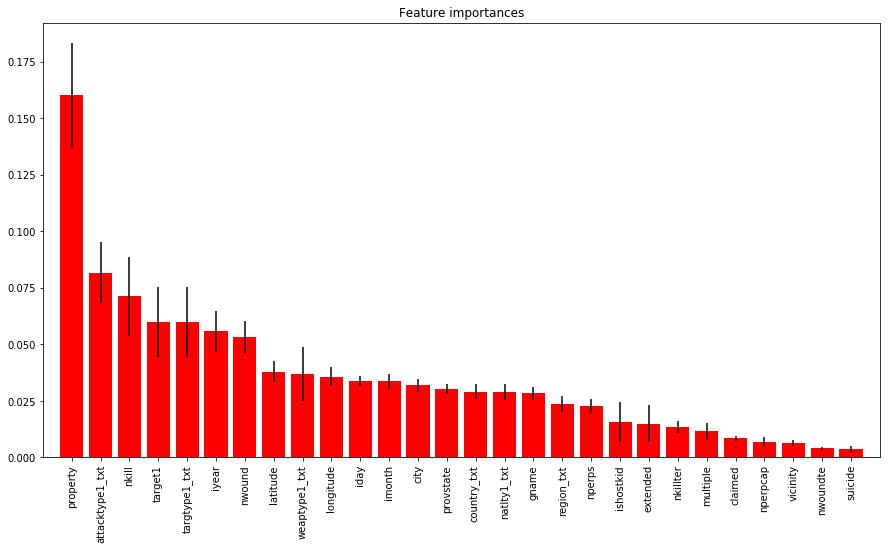

In [320]:
plt.figure(figsize=(15,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), fnames, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [159]:
#Dimesnionality Redction based on features selection above

In [321]:
feature_cols = [
    'iyear', 'imonth', 'iday', 
    #'extended', 
    #'multiple', 
    'country_txt','region_txt', 'provstate', 'city', #'vicinity',
    'latitude', 'longitude',
    'attacktype1_txt', 
    'weaptype1_txt', 
    'targtype1_txt', 'target1',
    'nperps', 'nperpcap', 'nkillter', #'nwoundte', 
    'claimed',  'gname',
    'nkill',  'nwound', 'natlty1_txt',
    #'suicide',
    'property', #'ishostkid'
]

## Experimental Desgin

Randamizing, Splitting the data into training and test sets (tranditional or Concept drift in case of time involved)
Treatment for imblance (undersampling the majority class and oversampling the minority class)
Cross validation such as 10 flods 
Bootstrapping resmapling


#### Treatment for imbalance 

Class 0: 17335
Class 1: 135287
Proportion: 0.13  : 1


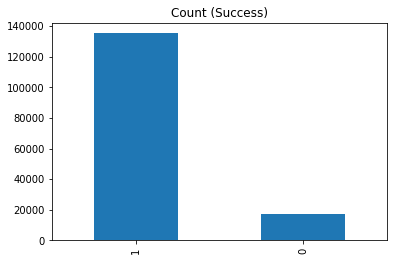

In [300]:
class_count = mydata.success.value_counts()

print('Class 0:', class_count[0])
print('Class 1:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ' : 1')

class_count.plot(kind='bar', title='Count (Success)');


In [301]:
from sklearn.utils import resample

In [302]:
#Up-sample Minority Class
# Separate majority and minority classes
df_majority = mydata[mydata.success ==1]
df_minority = mydata[mydata.success ==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=20000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
mydata = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
mydata.success.value_counts()


1    135287
0     20000
Name: success, dtype: int64

In [303]:
#Down-sample Majority Class
# Separate majority and minority classes
df_majority = mydata[mydata.success ==1]
df_minority = mydata[mydata.success ==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=20000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
mydata = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
mydata.success.value_counts()


1    20000
0    20000
Name: success, dtype: int64

Class 0: 20000
Class 1: 20000
Proportion: 1.0  : 1


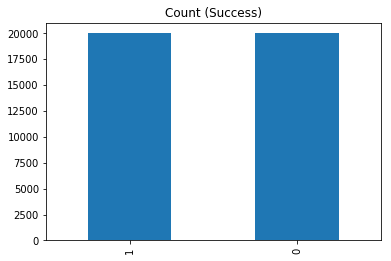

In [304]:
class_count = mydata.success.value_counts()

print('Class 0:', class_count[0])
print('Class 1:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ' : 1')

class_count.plot(kind='bar', title='Count (Success)');

In [322]:
mydata.shape

(40000, 30)

#### Train Validation test split

In [323]:
mydata.shape

(40000, 30)

In [324]:
target_col =  target_col

In [325]:
X = mydata[feature_cols].fillna(0)
y = mydata[target_col]


In [326]:
X.shape

(40000, 22)

In [327]:
y.shape

(40000,)

In [328]:
X_train, X_vald_test, y_train, y_vald_test = train_test_split(X, y, test_size=0.4 , shuffle = True)
X_vald, X_test, y_vald, y_test = train_test_split(X_vald_test, y_vald_test, test_size=0.5 , shuffle = True)

In [329]:
X_train.shape

(24000, 22)

In [330]:
X_vald.shape

(8000, 22)

In [331]:
X_test.shape

(8000, 22)

In [332]:
y_train.shape

(24000,)

In [333]:
y_vald.shape

(8000,)

In [334]:
y_test.shape

(8000,)

#### Model Selection

In [98]:
mytable = pd.DataFrame(columns= ['model_name' ,'model_score'])


#Cross Validation 10 folds define fuction
from sklearn.model_selection import cross_val_score
def cross_val(model , i):
    scores = cross_val_score(model , X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    print ('model accuracy = ',scores)
    
    mytable.loc[i ,'model_name'] = (type(model).__name__) 
    mytable.loc[i,'model_score'] = scores 
    
                         
    

In [99]:
#model1 RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [100]:
#Cross Validation 10 folds
cross_val(model , 0)


model accuracy =  0.9113754137153496


In [101]:
#model2 Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='auto')

In [103]:
#Cross Validation 10 folds
cross_val(model , 1)

model accuracy =  0.6977923502460678


In [104]:
#model SGD
from sklearn.linear_model import SGDClassifier
model =  SGDClassifier()

In [105]:
#Cross Validation 10 folds
cross_val(model , 2)

model accuracy =  0.5182924844908828


In [106]:
#model Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 6 , min_samples_leaf= 2)

In [107]:
#Cross Validation 10 folds
cross_val(model , 3)

model accuracy =  0.8697911241824869


In [108]:
#model Gaussian Naive-Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [109]:
#Cross Validation 10 folds
cross_val(model , 4)

model accuracy =  0.5801246554325212


In [110]:
#model SVC 
from sklearn.svm import LinearSVC
model = LinearSVC(penalty = 'l1' , dual  = False)

In [111]:
#Cross Validation 10 folds
warnings.filterwarnings('ignore')
cross_val(model , 5)

model accuracy =  0.6822921068721829


In [112]:
#model KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)

In [113]:
#Cross Validation 10 folds
cross_val(model , 6)

model accuracy =  0.6524159771338502


In [114]:
#Model Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [115]:
#Cross Validation 10 folds
cross_val(model , 7)

model accuracy =  0.8498751339988658


In [116]:
mytable_sort = mytable.sort_values(by='model_score', ascending=False)

In [117]:
mytable_sort

,model_name,model_score
0,RandomForestClassifier,0.911375
3,DecisionTreeClassifier,0.869791
7,GradientBoostingClassifier,0.849875
1,LogisticRegression,0.697792
5,LinearSVC,0.682292
6,KNeighborsClassifier,0.652416
4,GaussianNB,0.580125
2,SGDClassifier,0.518292


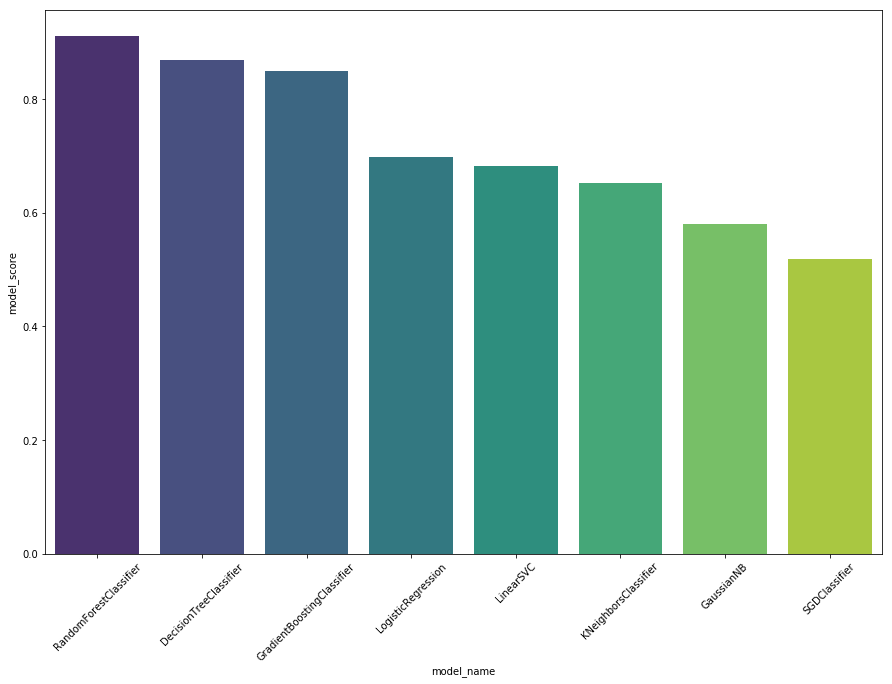

In [118]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 45, ha = 'center')
sns.barplot(mytable_sort.model_name, mytable_sort.model_score , palette = 'viridis');

### Improving the Model
deal with very high accuracy(Fixation varibales , overfitting)
deal with very low performance (many need new variables or more obervations)
itterate to improve the model performance 
#### Model Evaluation, calibartion and  hyperparmeters tunning

In [119]:
from sklearn.model_selection import GridSearchCV

In [189]:
#Model Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0, max_depth=1, random_state=0)
n_range= range(2,100)
param_grid = {'n_estimators': n_range }
grid = GridSearchCV(model, param_grid , cv =10 , scoring = 'f1' , n_jobs = -1)
# n_jobs = -1 for parrallel processing if the HW and SW suppots it. 



In [190]:
grid.fit(X_train , y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(2, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [195]:
# GB_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_n_estimators')
# # Save the dataframe
# GB_results.to_csv('../code/GB_results2.csv' , index= False)

In [196]:
#GB_results

In [244]:
# fig = plt.figure()
# ax = fig.gca()
# GB_results.plot(ax=ax , x ='param_n_estimators', y = 'mean_test_score')
# ax.set_xlim(0,100)



In [198]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8534348903056772
{'n_estimators': 96}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=96,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [180]:
#model Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 1)
n_range1= range(2,15)
param_grid = {'max_depth': n_range1 }
grid = GridSearchCV(model, param_grid , cv =10 , scoring = 'f1' , n_jobs = -1)
# n_jobs = -1 for parrallel processing if the HW and SW suppots it. 

In [181]:
grid.fit(X_train , y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [182]:
# DT_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_max_depth')
# # Save the dataframe
# DT_results.to_csv('../code/DT_results2.csv' , index= False)

In [186]:
#DT_results

In [245]:
# DT_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_max_depth')
# DT_results.plot(x ='param_max_depth', y = 'mean_test_score')

In [188]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8926379379937673
{'max_depth': 11}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [199]:
#model RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1)
n_range= range(2,30)
param_grid = {'n_estimators': n_range }
grid = GridSearchCV(model, param_grid , cv =10 , scoring = 'f1' , n_jobs = -1)
# n_jobs = -1 for parrallel processing if the HW and SW suppots it. 

In [200]:
grid.fit(X_train , y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(2, 30)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [246]:
# RF_results = pd.DataFrame(grid.cv_results_).sort_values(by = 'param_n_estimators')
# # Save the dataframe
# RF_results.to_csv('../code/RF_results2.csv' , index= False)

In [203]:
#RF_results

In [247]:
# RF_results.plot(x ='param_n_estimators', y = 'mean_test_score')

In [205]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.928214757894134
{'n_estimators': 27}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## Final Modeling 
Classification vs regression linearity vs non linearty for classifier and adat are linear (SVM(linear kernel) , linear logistic regression , Naivebase) for calssifier and data are nonlinear (SVM(nonlinear kernel) , deceision tree ,random forest, KNN ) Measure (distance measures: Eculaidne or Manhatan , Similarty meausre: Cosine similarity)


In [227]:
#model1 RandomForest
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=27)

In [228]:
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [229]:
y_pred1 = model1.predict(X_vald)
# Model Accuracy
print(accuracy_score(y_vald, y_pred1))

0.931625


In [230]:
y_pred1 = model1.predict(X_test)
# Model Accuracy
print( accuracy_score(y_test, y_pred1))

0.9305


In [231]:
#model2 Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth = 11)

In [232]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [233]:
y_pred2 = model2.predict(X_vald)
# Model Accuracy
print( accuracy_score(y_vald, y_pred2))

0.89925


In [234]:
y_pred2 = model2.predict(X_test)
# Model Accuracy
print( accuracy_score(y_test, y_pred2))

0.89975


In [235]:
#Model Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(n_estimators=96, learning_rate=1.0, max_depth=1, random_state=0)


In [236]:
model3.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=96,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [237]:
y_pred3 = model3.predict(X_vald)
# Model Accuracy
print( accuracy_score(y_vald, y_pred3))

0.857625


In [238]:
y_pred3 = model3.predict(X_test)
# Model Accuracy
print( accuracy_score(y_test, y_pred3))

0.8525


## Evaluation for the final Models

Regression problem (R squared , goodness of fit , AIC (Akaike information criterion) , RMSE (root mean square error)
Classification (Confucion matric , ROC (receiver opecrating charchritices) , Accurracy , Recall , Prescision)
compare performnce between diffrent models (contingency tables , multivariate analysis of variance)


### confusion matrix

In [239]:
def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
     
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 

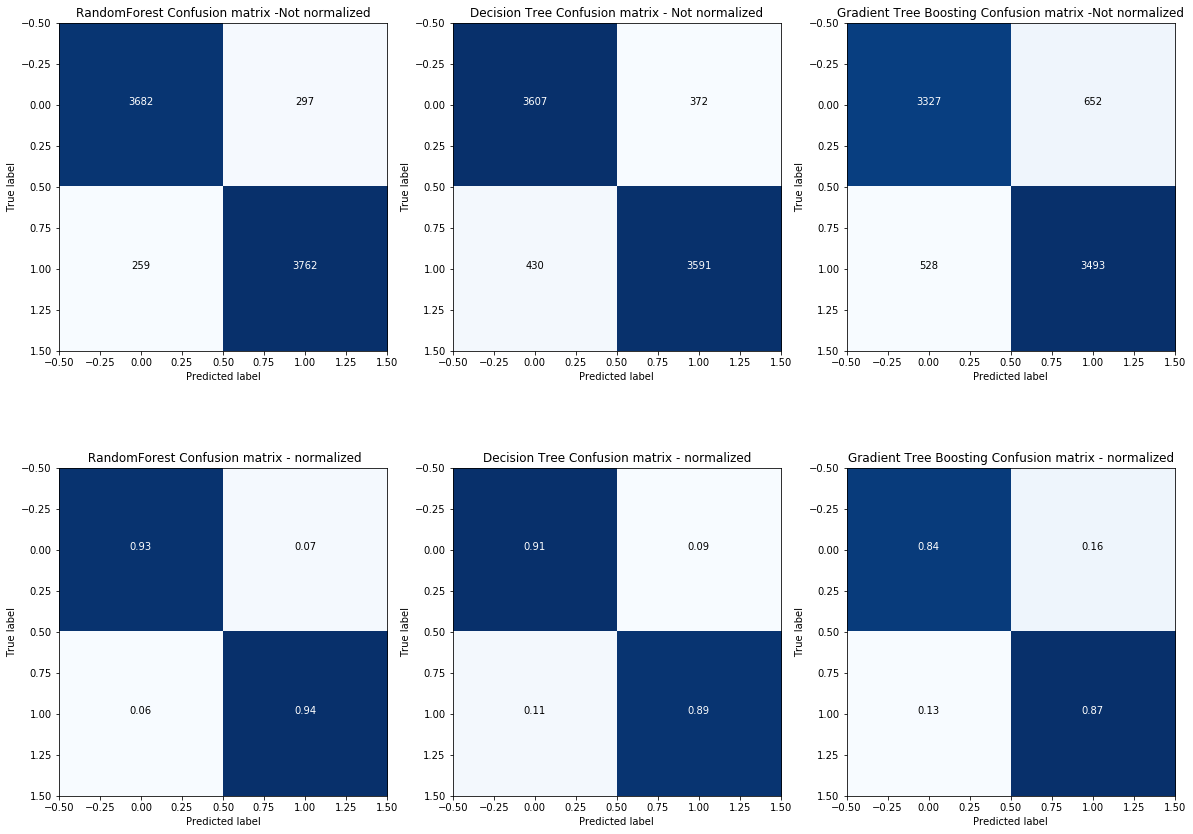

In [240]:
plt.figure(figsize=(20,15))

#model1 RandomForest
cnf_matrix = confusion_matrix(y_test, y_pred1)
plt.subplot(2,3,1)
plot_confusion_matrix(cnf_matrix, title='RandomForest Confusion matrix -Not normalized')
plt.subplot(2,3,4)
plot_confusion_matrix(cnf_matrix, normalize=True ,  title=' RandomForest Confusion matrix - normalized')

#model2 Decision Tree
cnf_matrix = confusion_matrix(y_test, y_pred2)
plt.subplot(2,3,2)
plot_confusion_matrix(cnf_matrix, title='Decision Tree Confusion matrix - Not normalized')
plt.subplot(2,3,5)
plot_confusion_matrix(cnf_matrix, normalize=True, title='Decision Tree Confusion matrix - normalized')

#model3 Gradient Tree Boosting
cnf_matrix = confusion_matrix(y_test, y_pred3)
plt.subplot(2,3,3)
plot_confusion_matrix(cnf_matrix, title='Gradient Tree Boosting Confusion matrix -Not normalized')
plt.subplot(2,3,6)
plot_confusion_matrix(cnf_matrix, normalize=True , title='Gradient Tree Boosting Confusion matrix - normalized')


In [241]:
#confusion_matrix precision , recall , f1-score
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
print('-'*20  ,'RandomForest', '-'*20)
print(classification_report(y_test, y_pred1))
print('-'*20 , 'Decision Tree' , '-' *20)
print(classification_report(y_test, y_pred2))
print('-'*15, 'Gradient Tree Boosting' ,'-'*15)
print(classification_report(y_test, y_pred3))

-------------------- RandomForest --------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3979
           1       0.93      0.94      0.93      4021

   micro avg       0.93      0.93      0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000

-------------------- Decision Tree --------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3979
           1       0.91      0.89      0.90      4021

   micro avg       0.90      0.90      0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000

--------------- Gradient Tree Boosting ---------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3979
           1       0.84      0.87      0.86      4021

   micro avg    

#### Receiver Operating Characteristic (ROC) metric

In [242]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score, r2_score, roc_auc_score, roc_curve

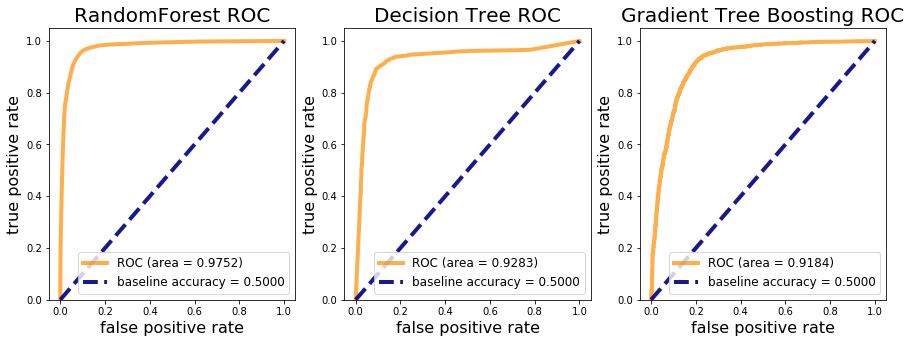

In [243]:
models = [model1 , model2 , model3]
names=['RandomForest', 'Decision Tree' , 'Gradient Tree Boosting']
s = 0
plt.figure(figsize=(15,5))
for m in models:
    y_pp = m.predict_proba(X_test)[:, 1]
    fpr_, tpr_, _ = roc_curve(y_test, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    s=s+1
    plt.subplot(1,3,s)

    plt.plot(fpr_, tpr_, label='ROC (area = %0.4f)' % auc_, color='darkorange', linewidth=4,   alpha=0.7)
    plt.plot([0, 1], [0, 1], color='navy', ls='dashed',alpha=0.9, linewidth=4, label='baseline accuracy = %0.4f' % acc_)

    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('false positive rate', fontsize=16)
    plt.ylabel('true positive rate', fontsize=16)
    plt.title(names[s-1] +' ROC', fontsize=20)
    plt.legend(loc="lower right", fontsize=12)


## Conclusions

Infrences , dissucsuions
Threates to validity (Internal , External , construct) and propose the soultion that may mitigate these threates
Next/ future steps
